In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Embedded Method

In [21]:
# Plot correlation matrix
def correlation_matrix_plot(df, asset):
    correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.9, fmt=".2f")
    plt.title(f'Correlation Matrix of {asset}')
    plt.tight_layout()
    plt.show()

In [22]:
# Feature Selection Pipeline
def select_features_rf(df, asset_name="Asset"):
    """
    Performs feature selection using a Random Forest regressor to extract feature importances for a given asset's DataFrame.

    Required Features: All features of the asset and performs additional engineering (e.g., moving averages).
    Parameters:
        df (pd.DataFrame): The input DataFrame for the asset.
        asset_name (str): Identifier for plotting and output.

    Returns:
        feat_importances (pd.Series): Feature importances sorted in descending order.
    """
    # 1. Preprocessing and Feature Engineering
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)


    # Add indicators that improve models to predict better (e.g., 20-day and 50-day moving averages)
    
    df['MA_20'] = df['Close'].rolling(window=20, min_periods=1).mean()
    df['MA_50'] = df['Close'].rolling(window=50, min_periods=1).mean()
    df['52W_High'] = df['High'].rolling(window=252, min_periods=1).max()
    df['52W_Low'] = df['Low'].rolling(window=252, min_periods=1).min()

    # Plot correlation matrix
    correlation_matrix_plot(df, asset_name)

    # Define feature columns and target variable
    features = ['Open', 'MA_20', 'MA_50', '52W_High', '52W_Low']
    target = 'Close'

    new_df = df.dropna()
    X = new_df[features]
    y = new_df[target]


    # 2. Train a Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=123)
    rf.fit(X, y)


    # 3. Extract and Plot Feature Importances
    importances = rf.feature_importances_
    feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

    print(f"\n{asset_name} - Feature Importances:")
    print(feat_importances)


    # 4. Plot feature importances as a bar chart
    plt.figure(figsize=(12, 6))
    ax = feat_importances.plot(kind='bar', title=f'Feature Importances - {asset_name}')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=90)

    # Add rounded importance values as labels on bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Plot correlation matrix
    correlation_matrix_plot(pd.concat([X, y], axis=1), asset_name)

    return feat_importances

### Feature Selection for Indexes

### Feature Selection for Each Index ###

Processing Index: NSEI


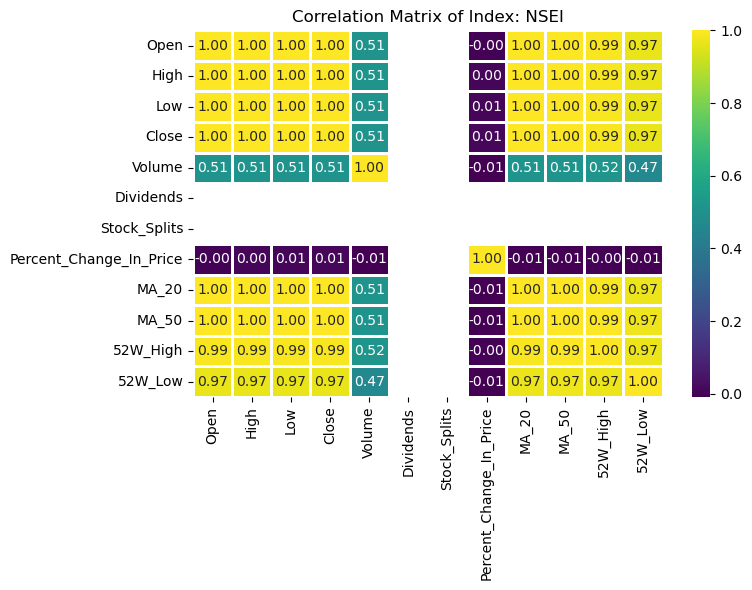


Index: NSEI - Feature Importances:
Open        0.354848
MA_20       0.290670
52W_High    0.283903
MA_50       0.070294
52W_Low     0.000286
dtype: float64


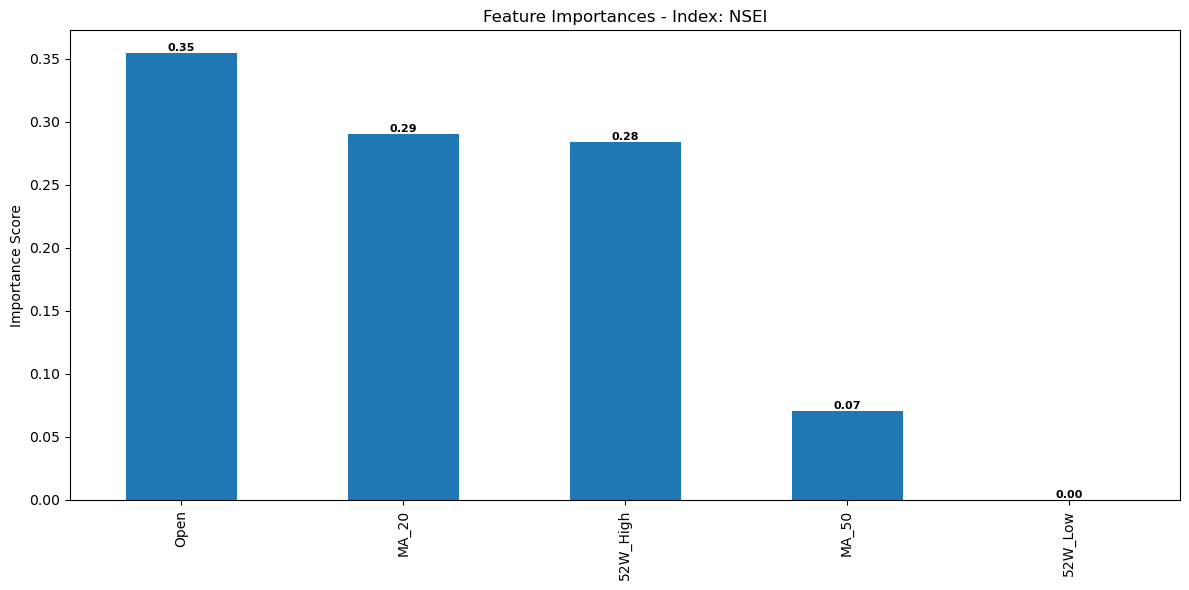

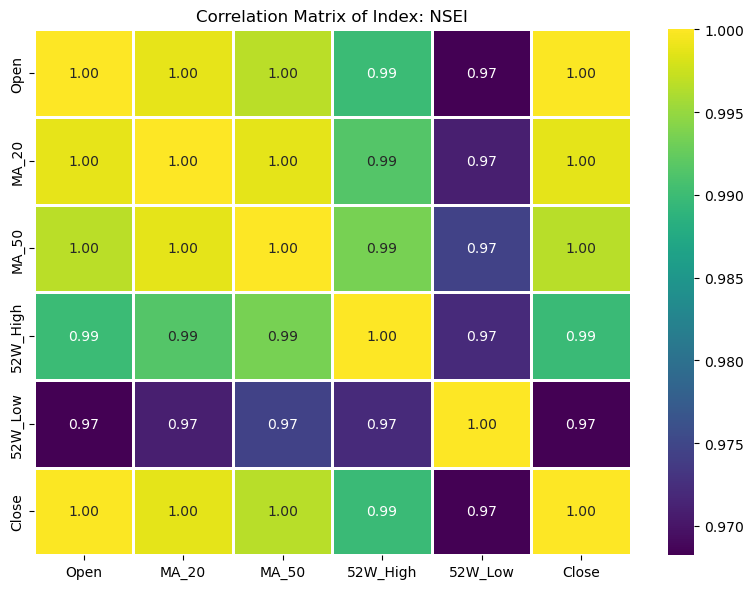


Processing Index: NSEBANK


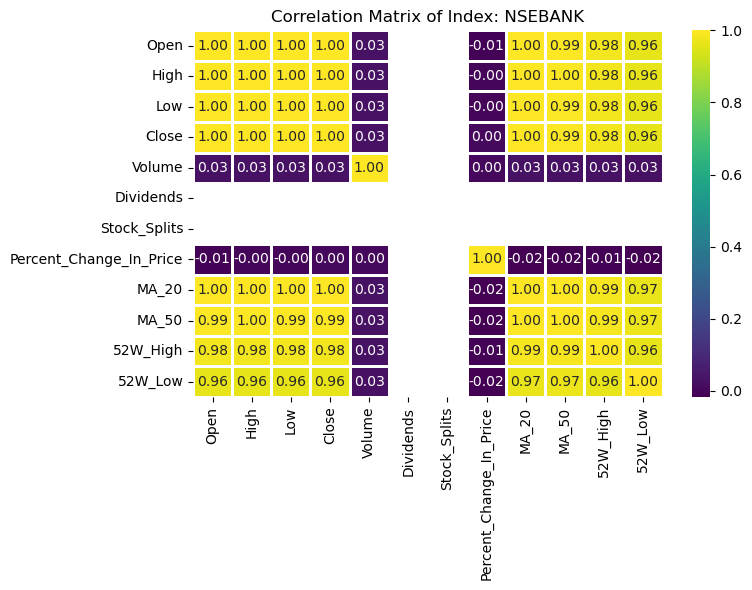


Index: NSEBANK - Feature Importances:
Open        0.994660
MA_20       0.002108
52W_High    0.001914
MA_50       0.001289
52W_Low     0.000029
dtype: float64


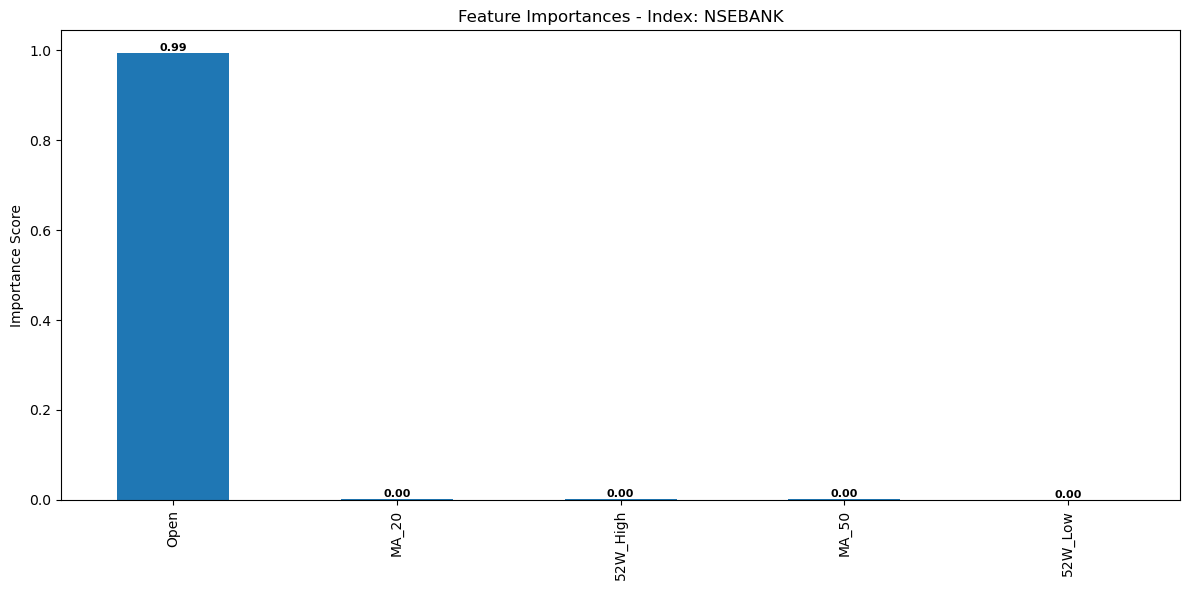

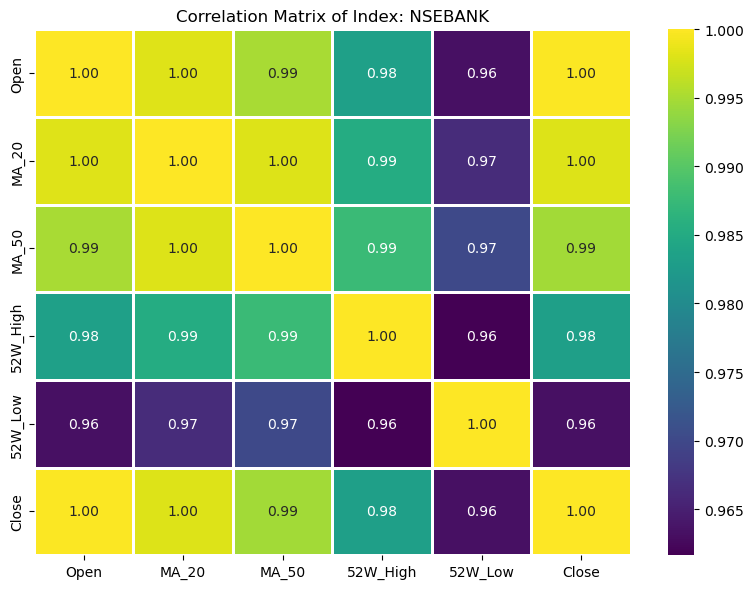


Processing Index: CNXIT


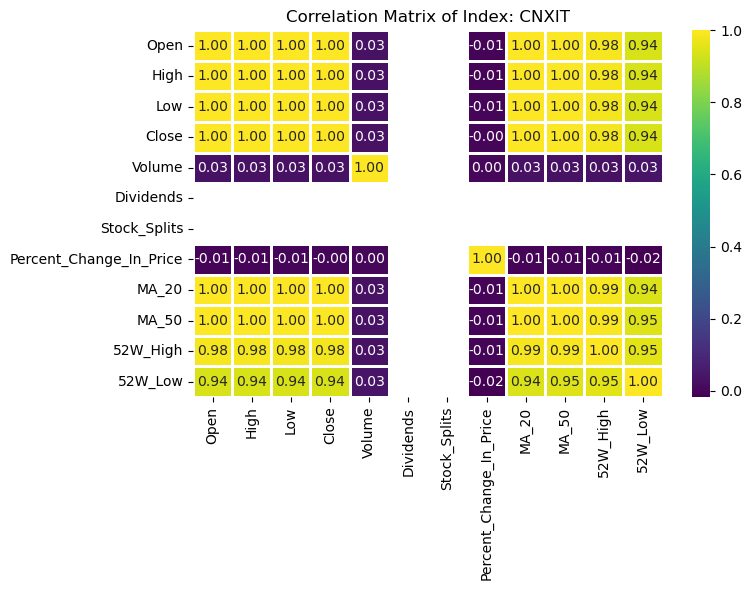


Index: CNXIT - Feature Importances:
Open        0.381235
MA_50       0.217179
52W_High    0.209372
MA_20       0.191926
52W_Low     0.000288
dtype: float64


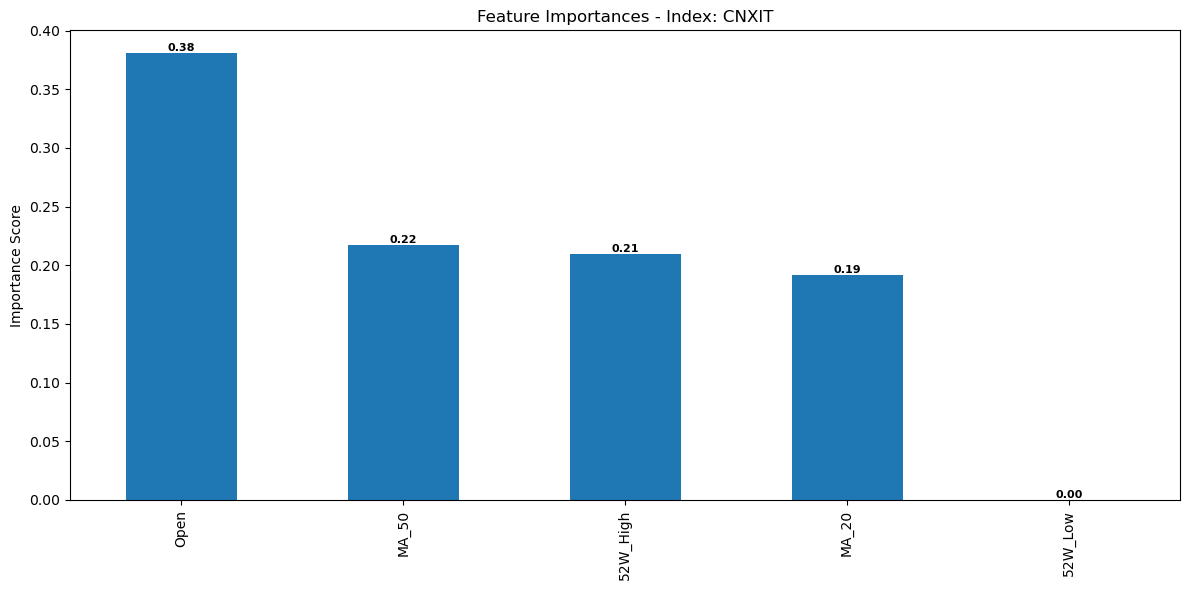

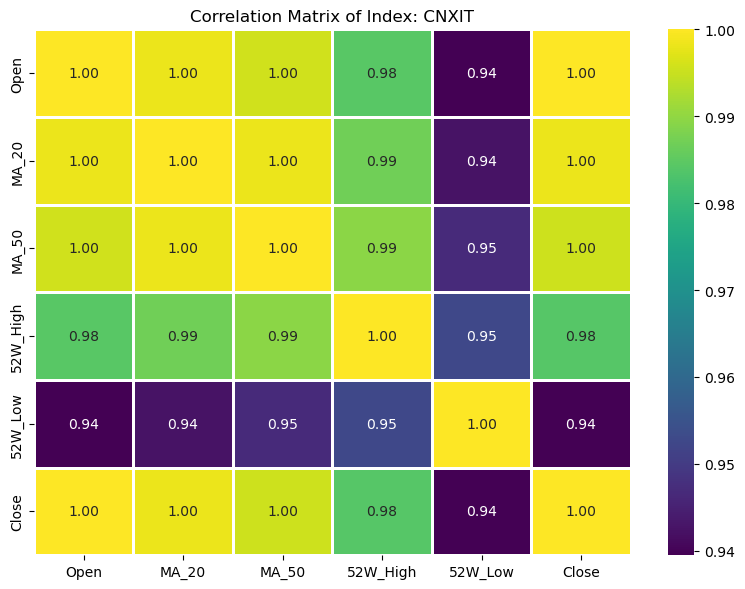


Processing Index: BSESN


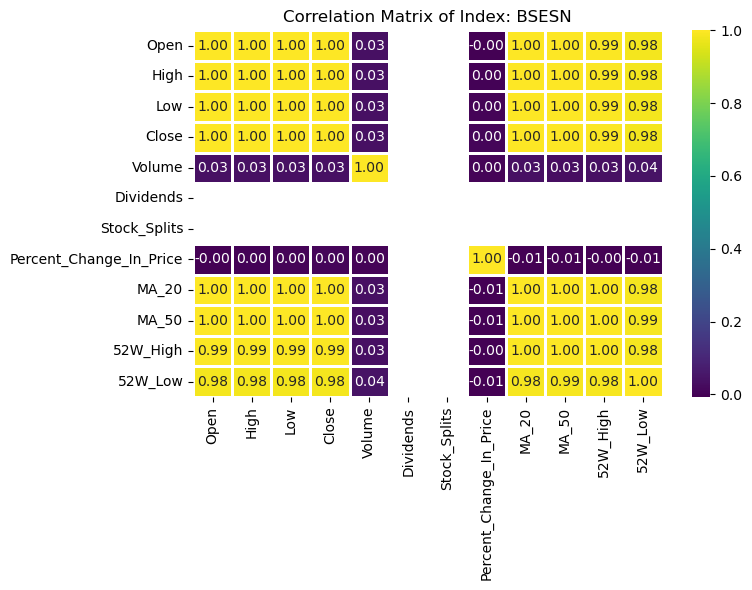


Index: BSESN - Feature Importances:
Open        0.963694
52W_High    0.020352
MA_20       0.009456
MA_50       0.006408
52W_Low     0.000091
dtype: float64


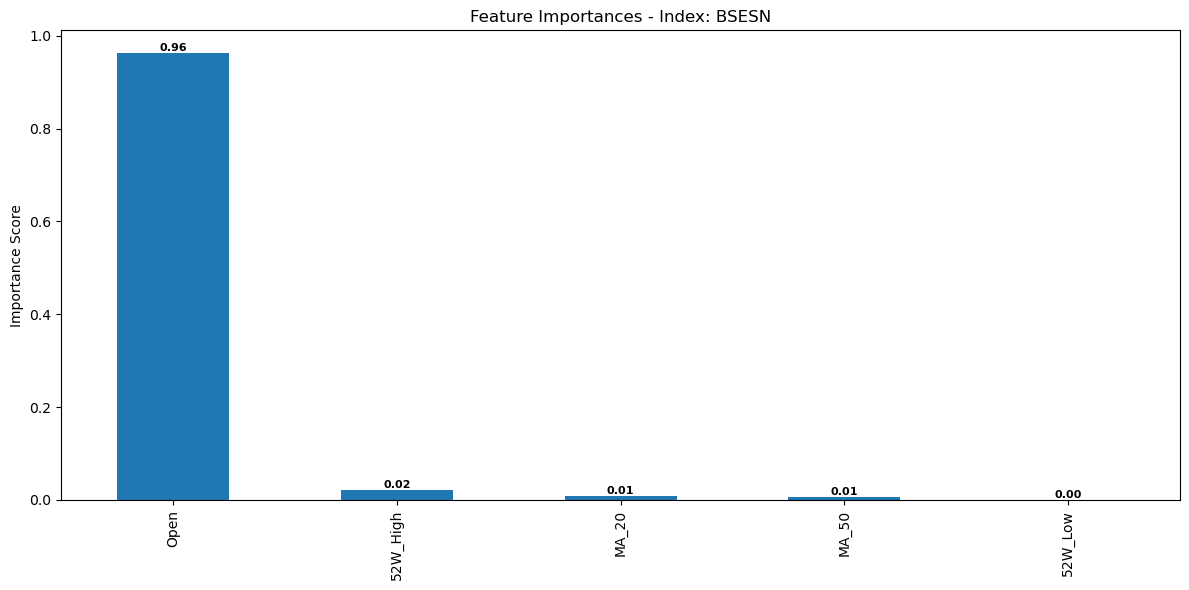

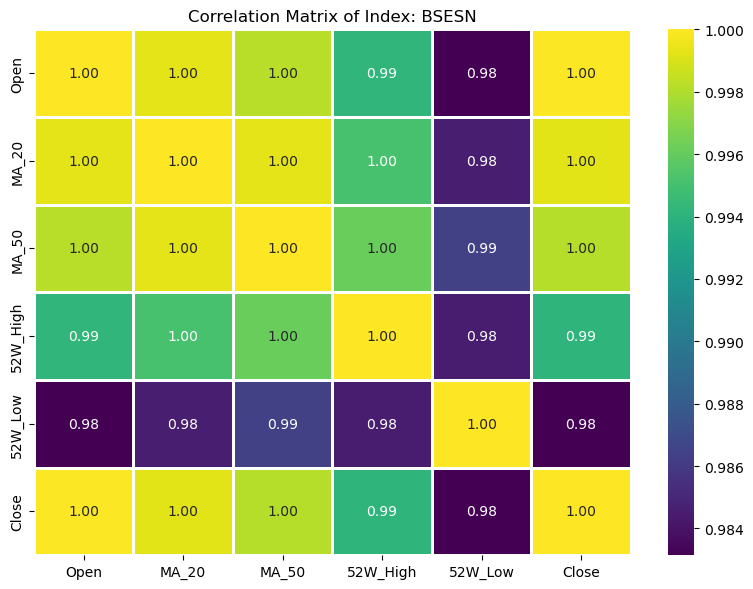


Processing Index: NIFTY_MIDCAP_100


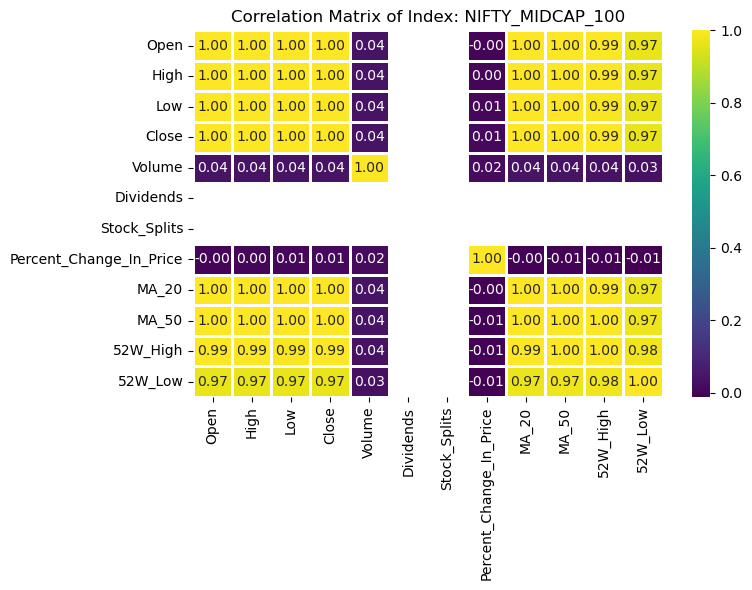


Index: NIFTY_MIDCAP_100 - Feature Importances:
Open        0.382825
MA_20       0.236169
MA_50       0.235693
52W_High    0.145197
52W_Low     0.000115
dtype: float64


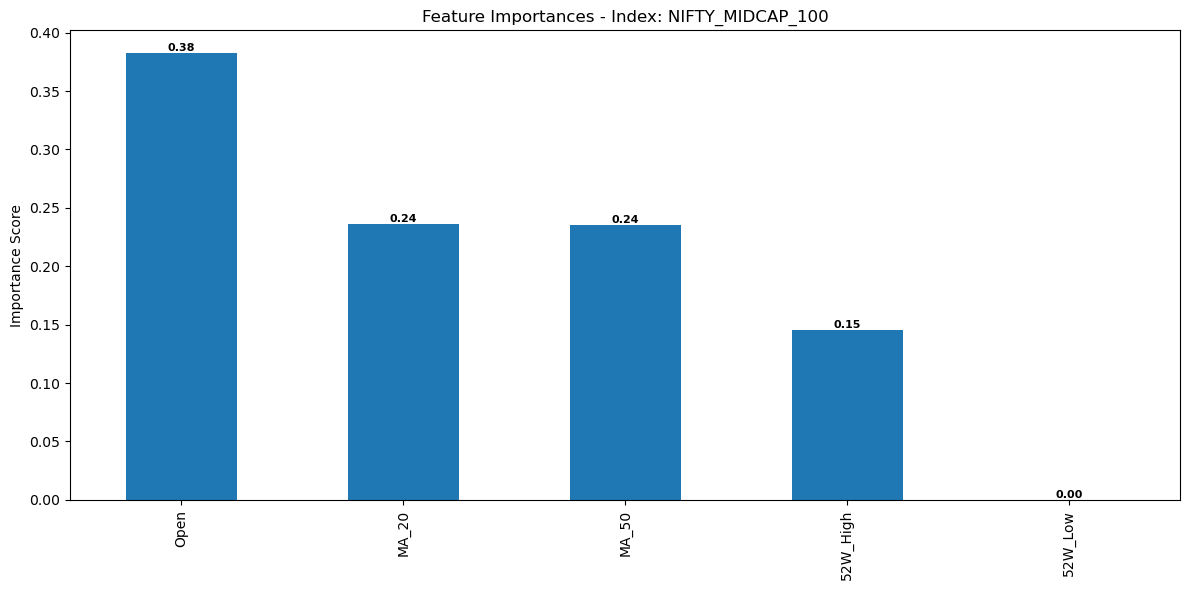

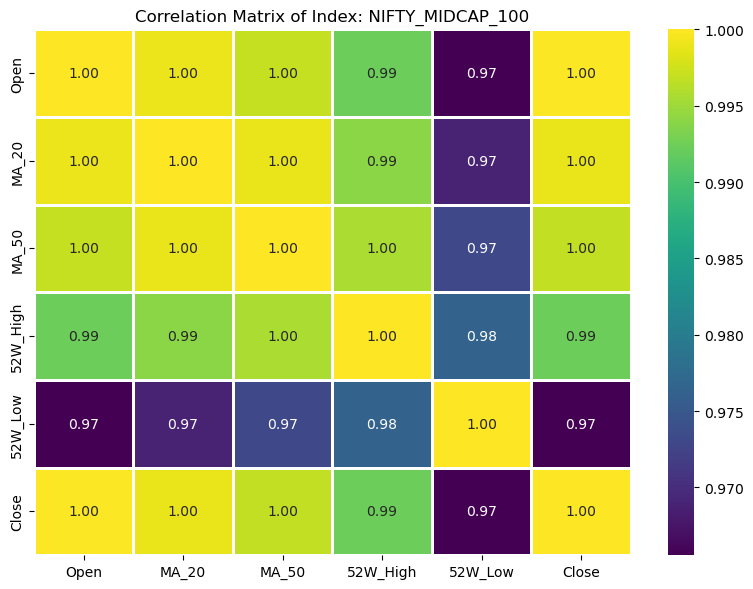


Processing Index: CNXPSUBANK


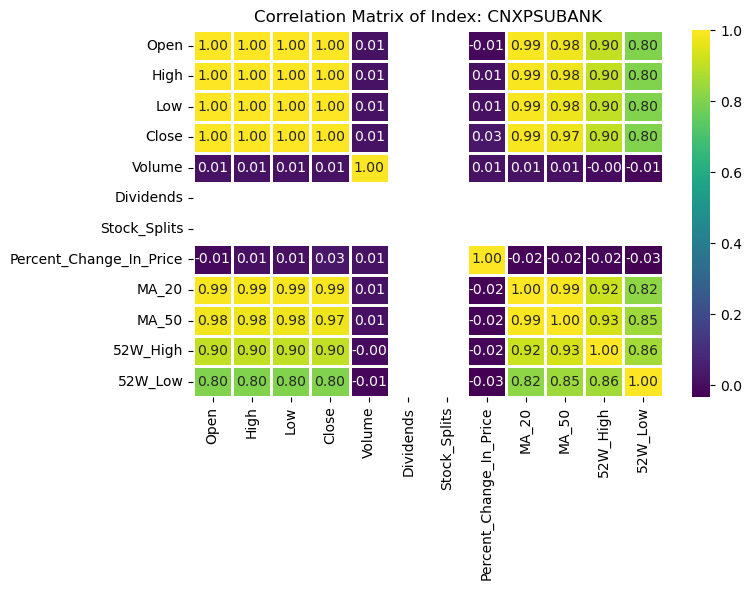


Index: CNXPSUBANK - Feature Importances:
Open        0.518883
MA_50       0.175361
52W_High    0.155855
MA_20       0.149625
52W_Low     0.000276
dtype: float64


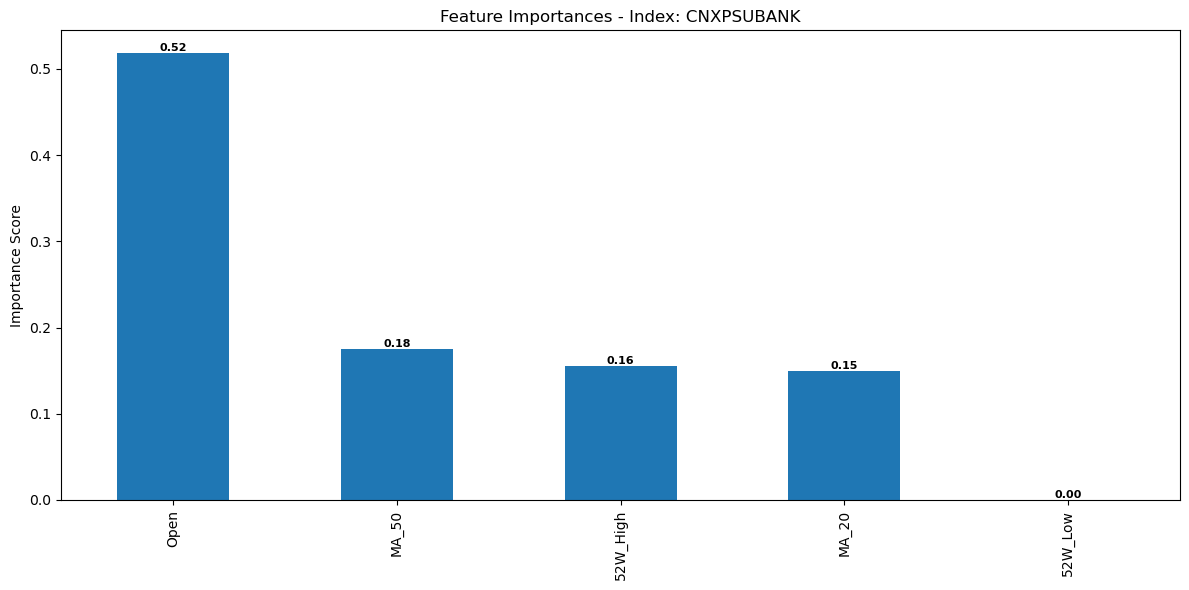

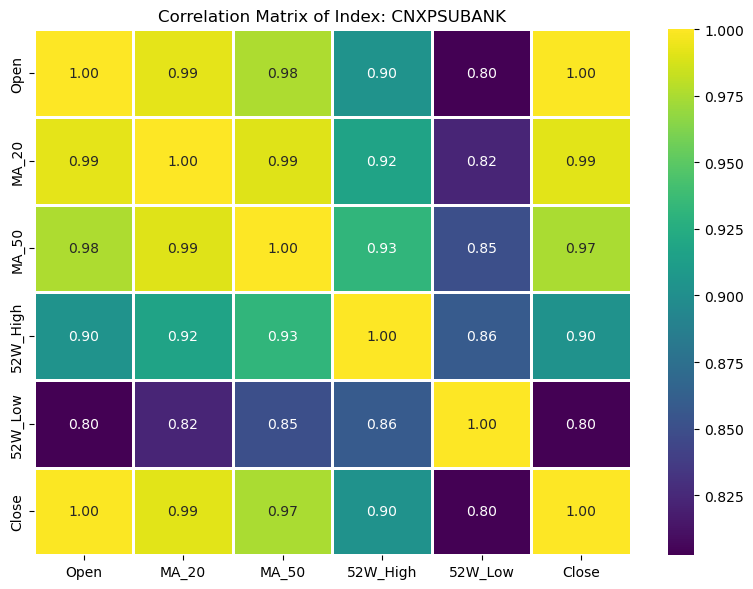


Processing Index: CNXAUTO


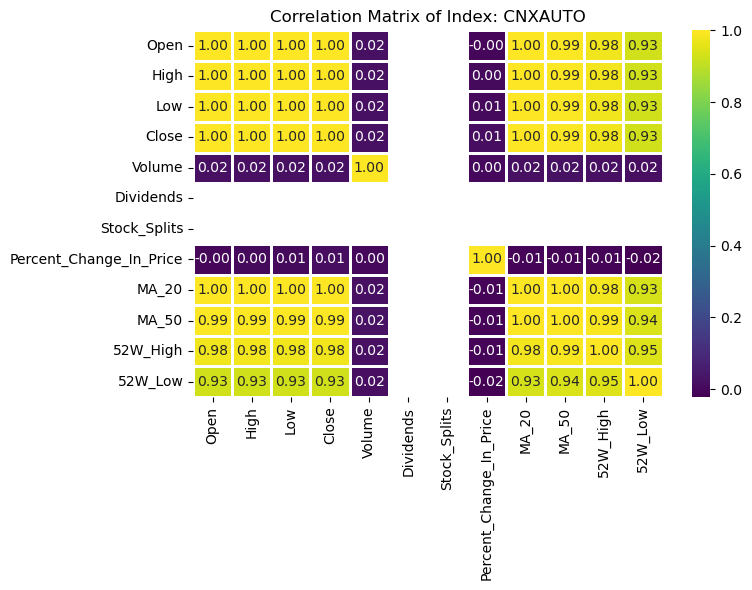


Index: CNXAUTO - Feature Importances:
Open        0.419551
MA_50       0.192513
MA_20       0.167412
52W_High    0.159041
52W_Low     0.061482
dtype: float64


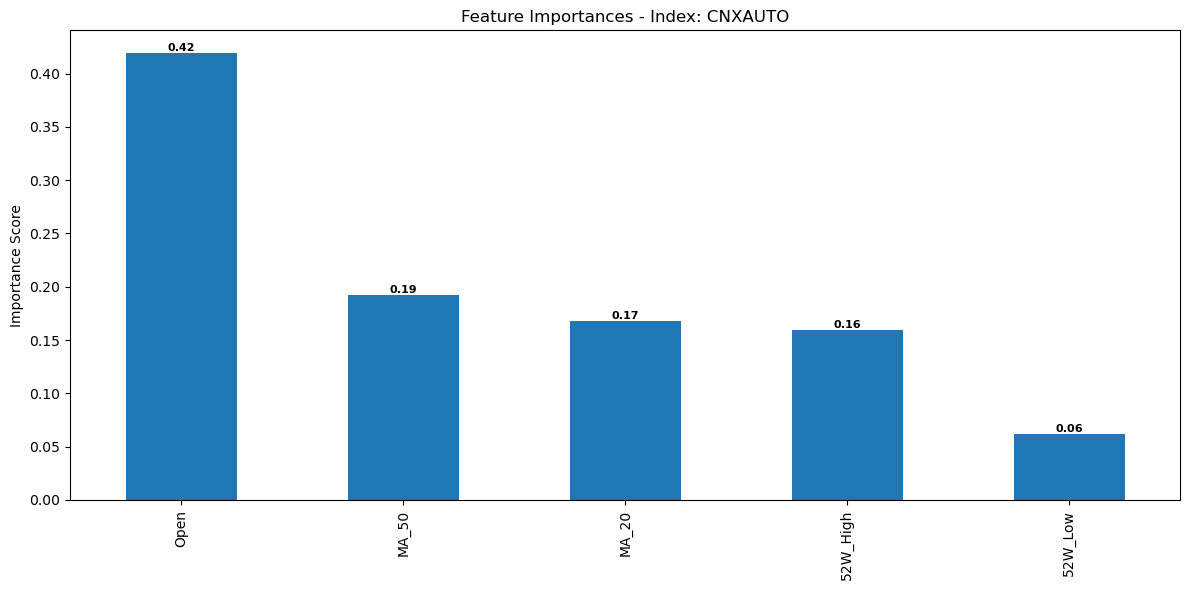

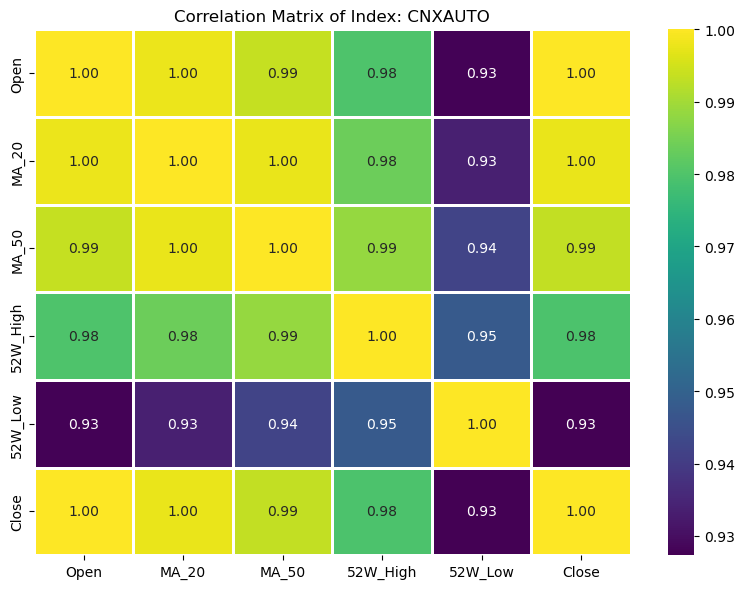


Processing Index: NIFTY_FIN_SERVICE


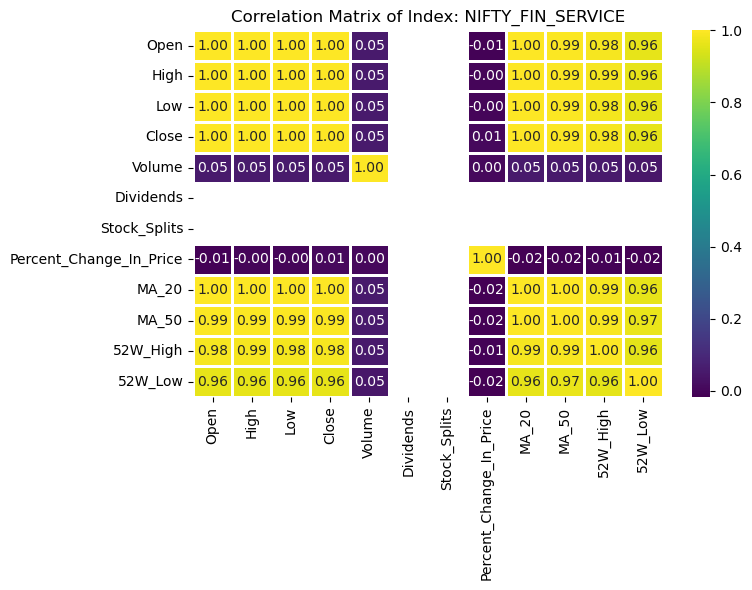


Index: NIFTY_FIN_SERVICE - Feature Importances:
Open        0.940335
52W_High    0.042607
MA_20       0.016141
MA_50       0.000886
52W_Low     0.000030
dtype: float64


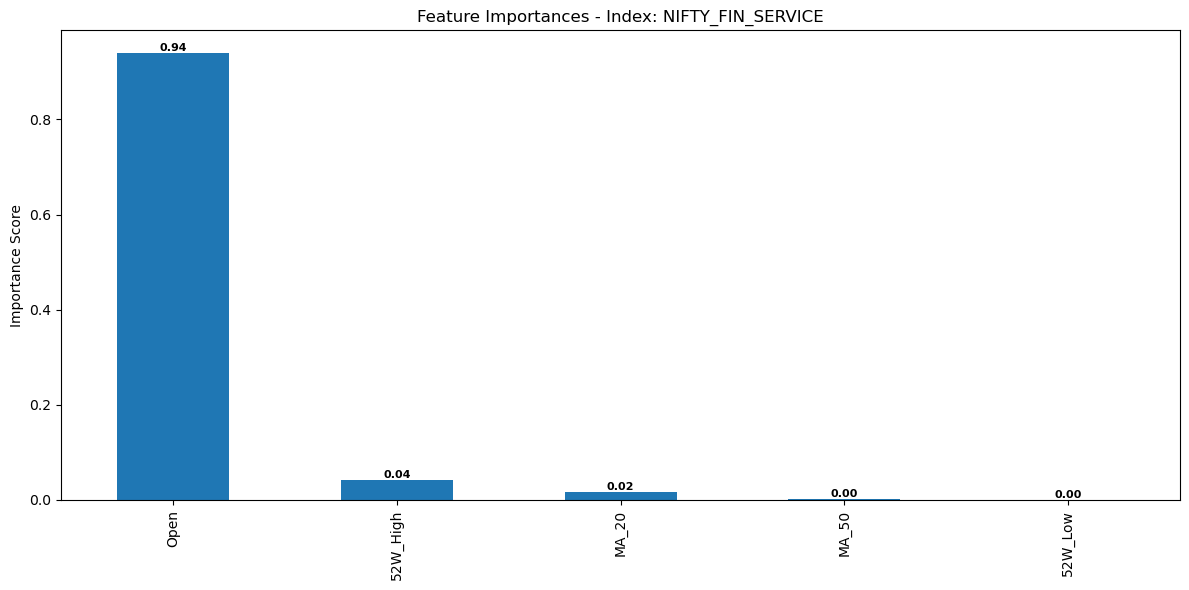

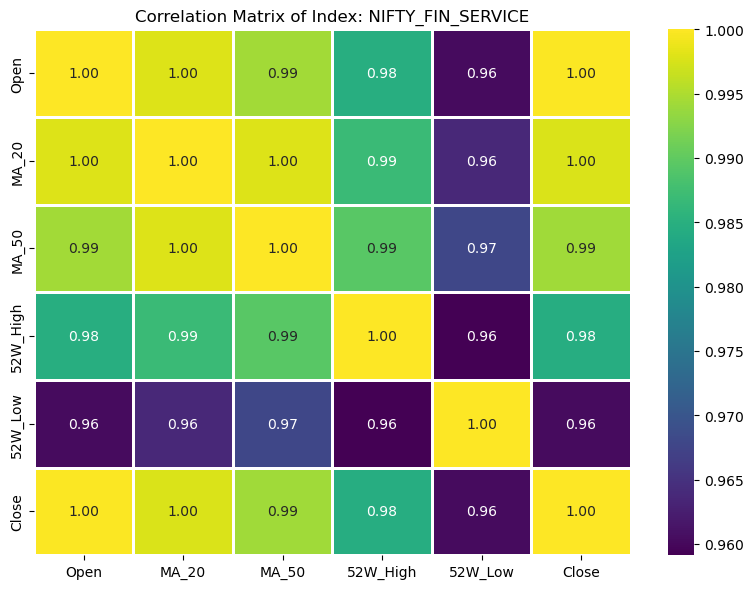

Open        0.940335
52W_High    0.042607
MA_20       0.016141
MA_50       0.000886
52W_Low     0.000030
dtype: float64

In [23]:
index_excel_file = '../Data/Index_Data.xlsx'
all_indexes = pd.read_excel(index_excel_file, sheet_name=None)

print("### Feature Selection for Each Index ###")
for sheet_name, df in all_indexes.items():
    asset_identifier = f"Index: {sheet_name}"
    print(f"\nProcessing {asset_identifier}")
    feat_imp = select_features_rf(df, asset_name=asset_identifier)
    
feat_imp

### Feature Selection for Mutual Funds

### Feature Selection for Each Mutual Fund ###

Processing Mutual Fund: 0P00005WL6


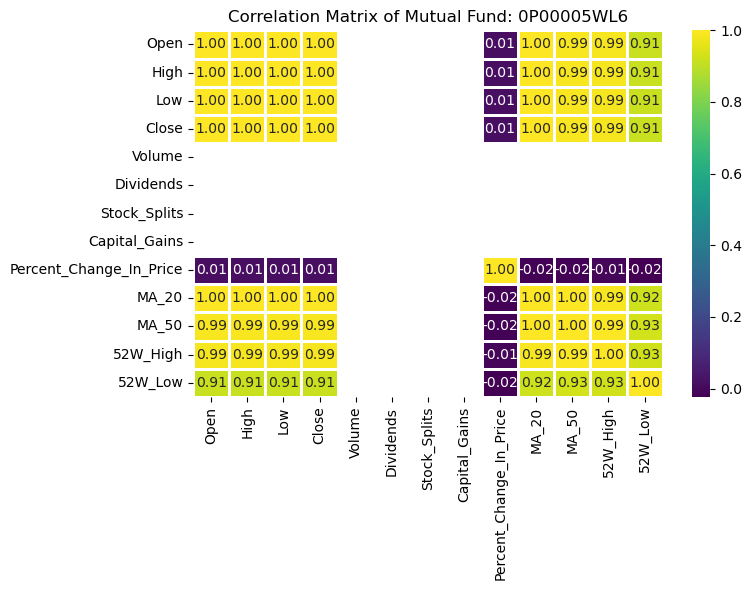


Mutual Fund: 0P00005WL6 - Feature Importances:
Open        0.862710
52W_High    0.069301
MA_50       0.054444
MA_20       0.013437
52W_Low     0.000107
dtype: float64


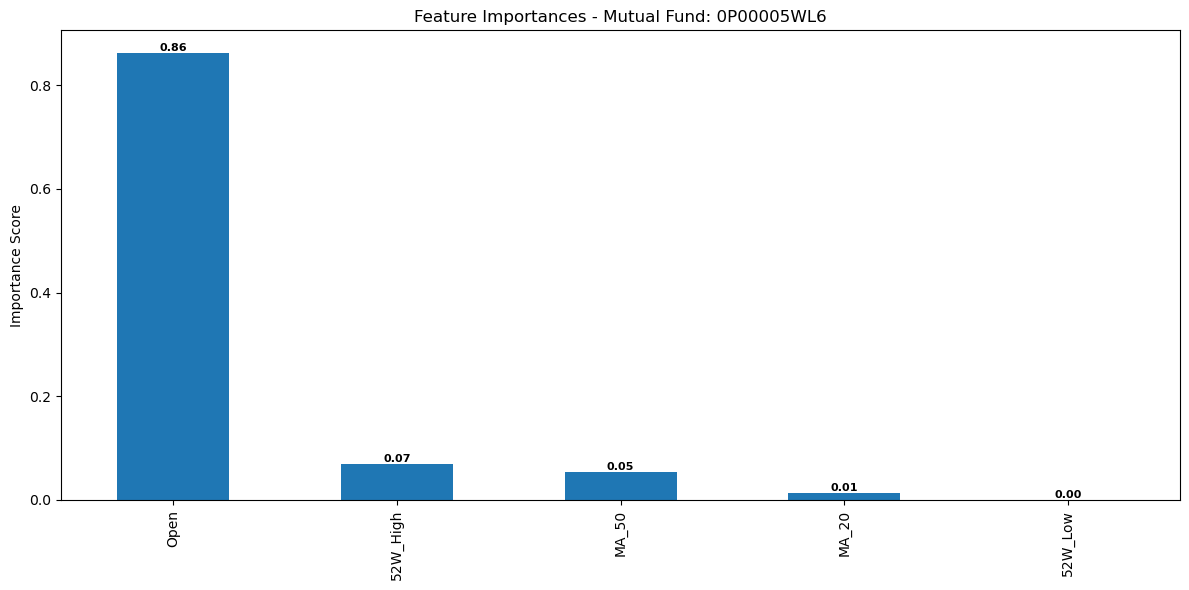

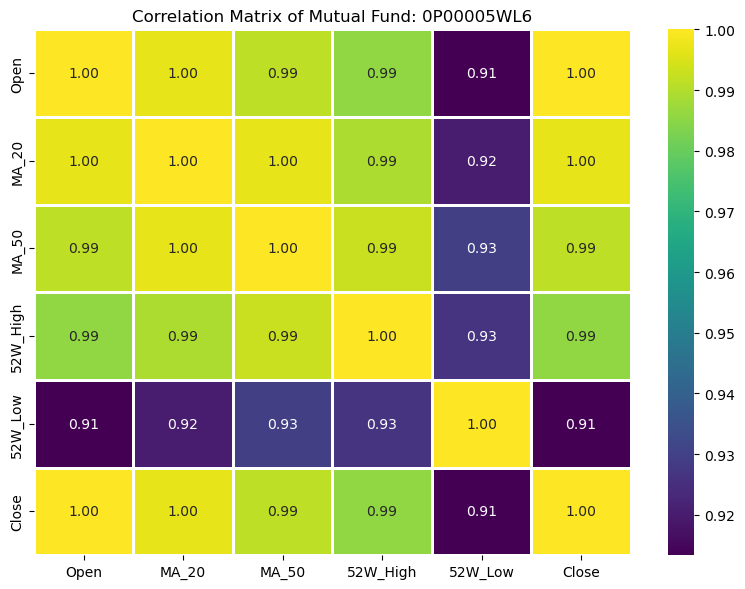


Processing Mutual Fund: UTINEXT50


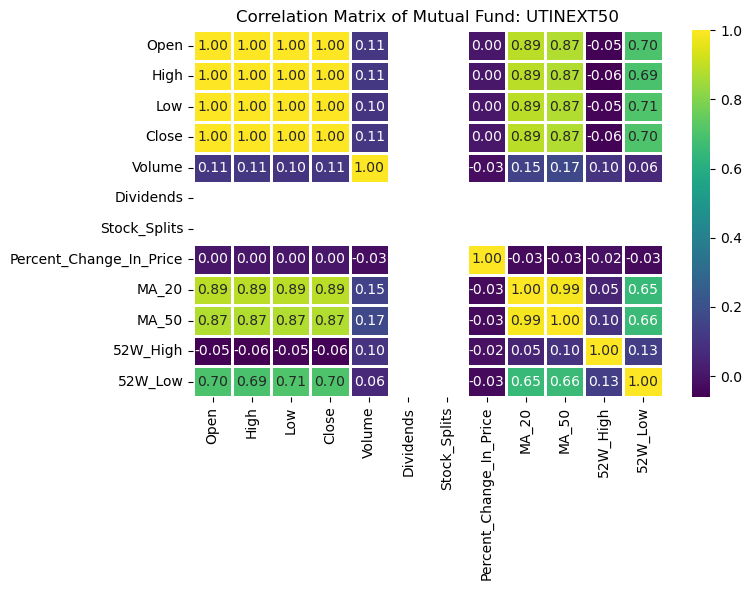


Mutual Fund: UTINEXT50 - Feature Importances:
Open        0.883064
52W_Low     0.040147
MA_20       0.035265
52W_High    0.023631
MA_50       0.017893
dtype: float64


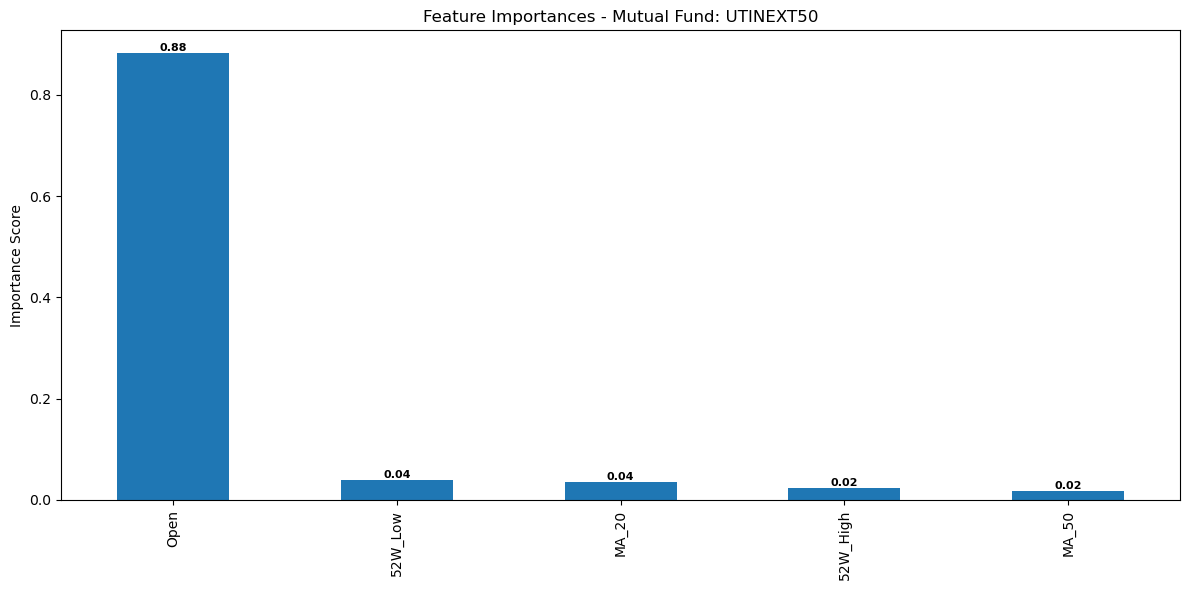

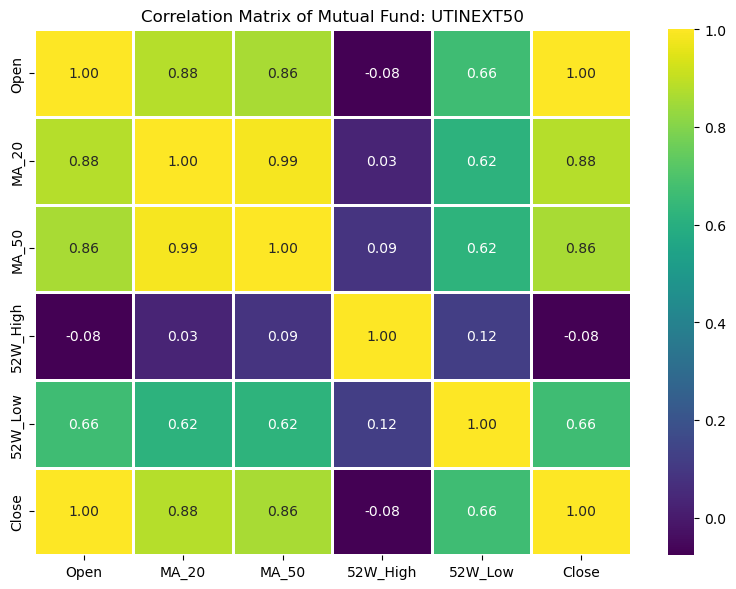


Processing Mutual Fund: 0P0000MLHH


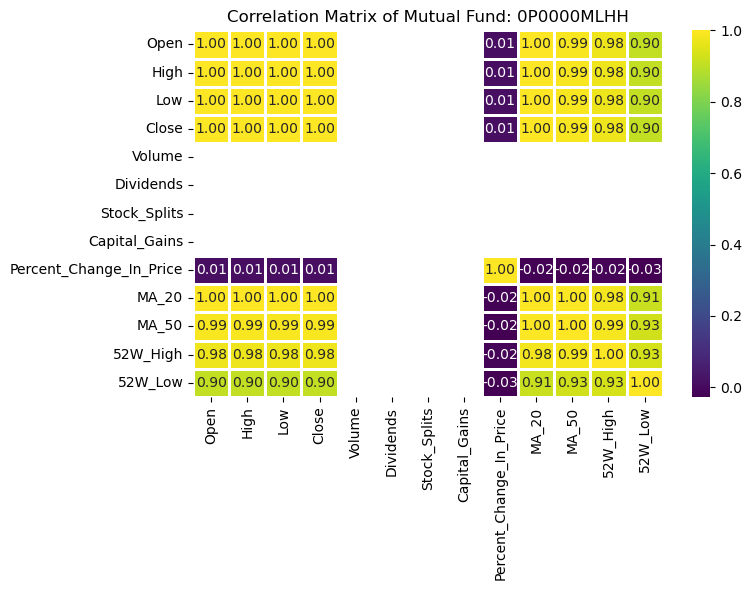


Mutual Fund: 0P0000MLHH - Feature Importances:
Open        0.964998
52W_High    0.022206
MA_20       0.012654
MA_50       0.000126
52W_Low     0.000016
dtype: float64


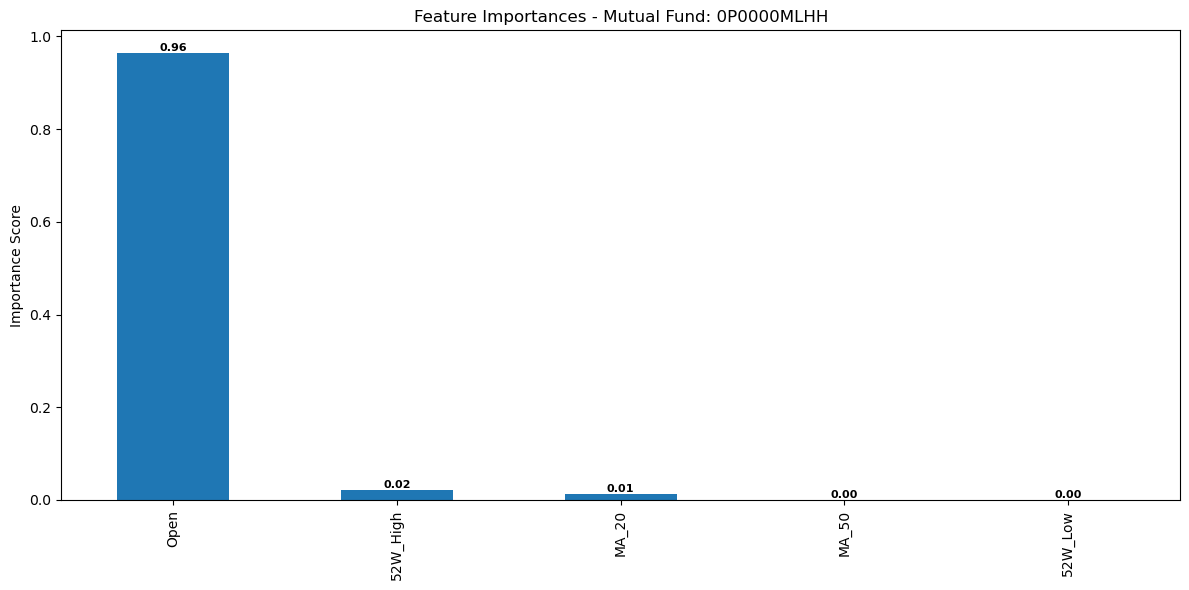

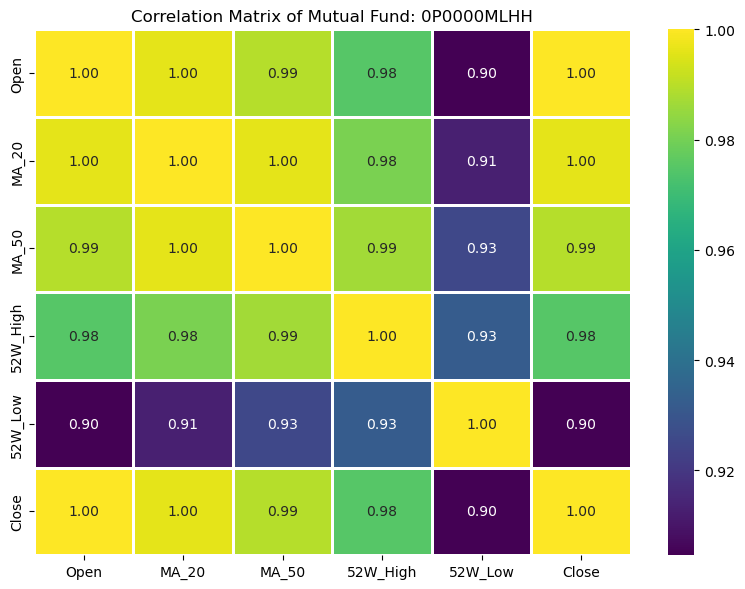


Processing Mutual Fund: 0P0000KV39


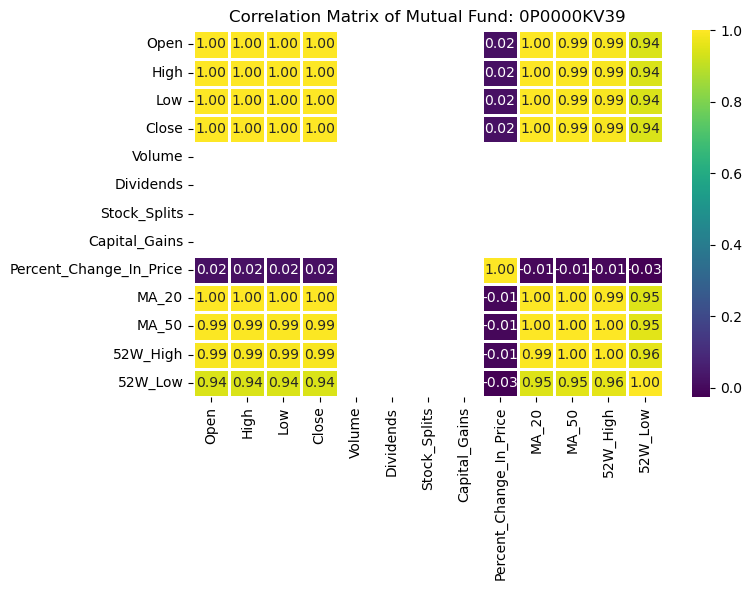


Mutual Fund: 0P0000KV39 - Feature Importances:
Open        0.875307
52W_High    0.061753
MA_50       0.048947
MA_20       0.013678
52W_Low     0.000315
dtype: float64


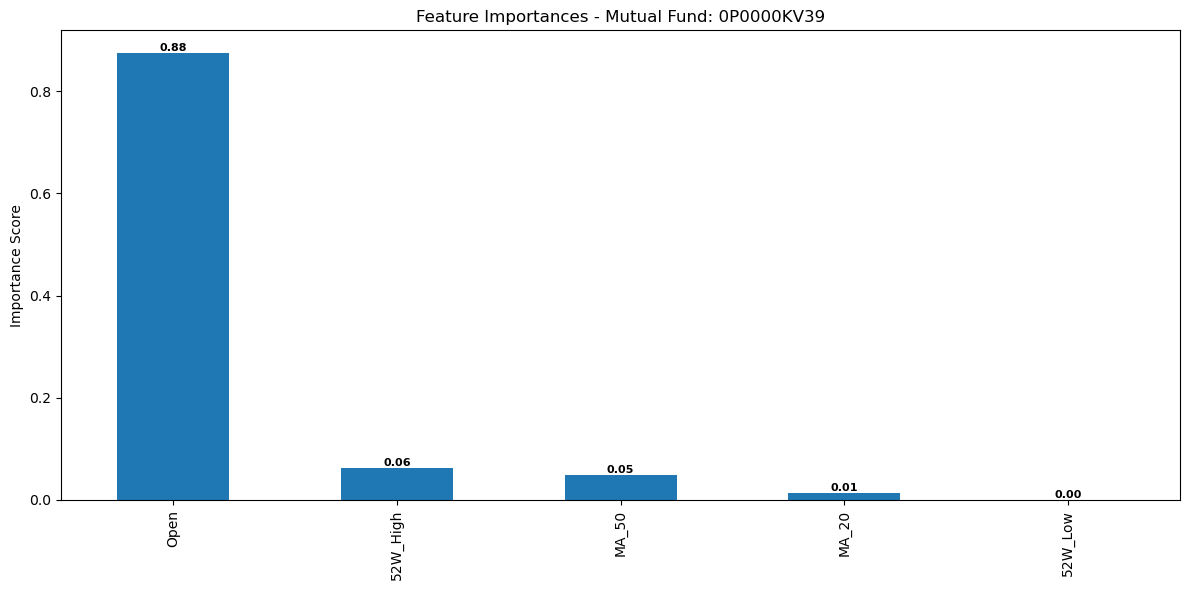

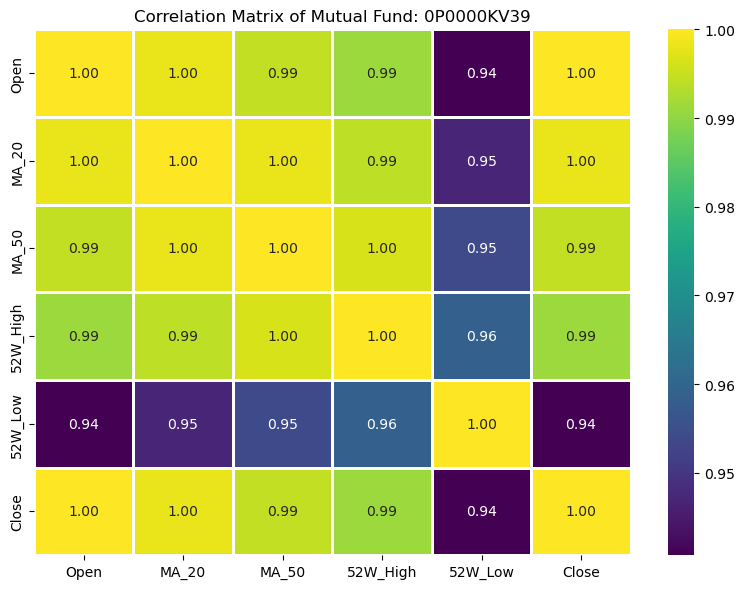


Processing Mutual Fund: 0P00009J3K


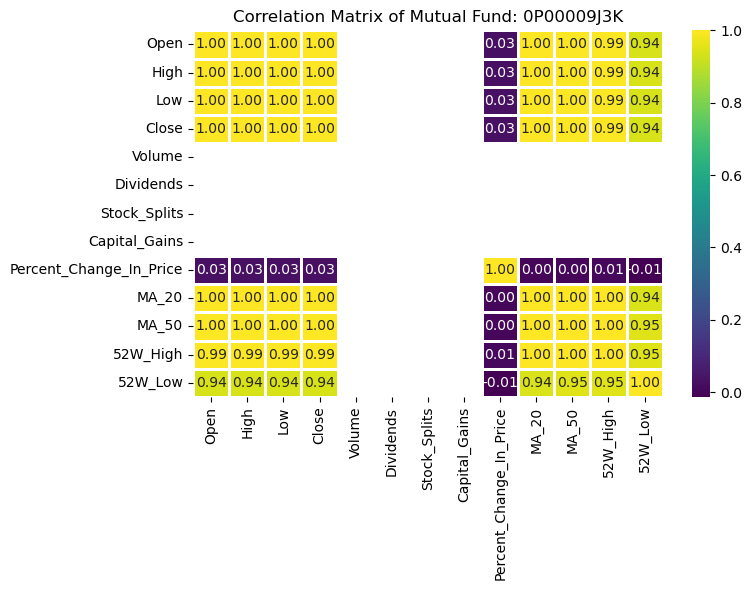


Mutual Fund: 0P00009J3K - Feature Importances:
Open        0.496713
MA_20       0.170590
MA_50       0.169905
52W_High    0.162754
52W_Low     0.000037
dtype: float64


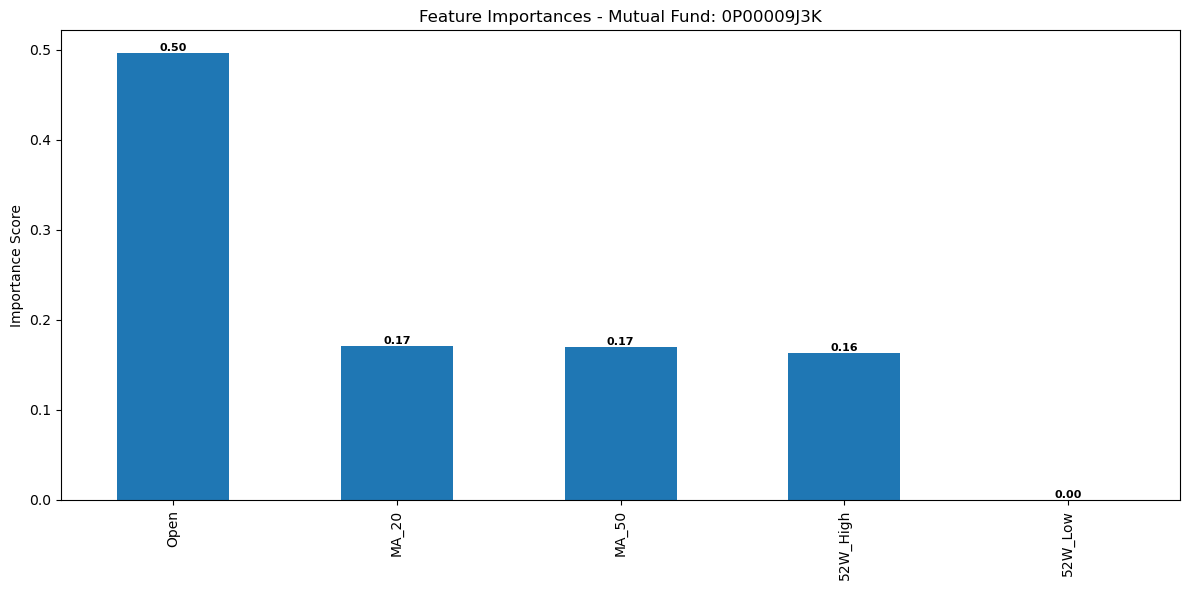

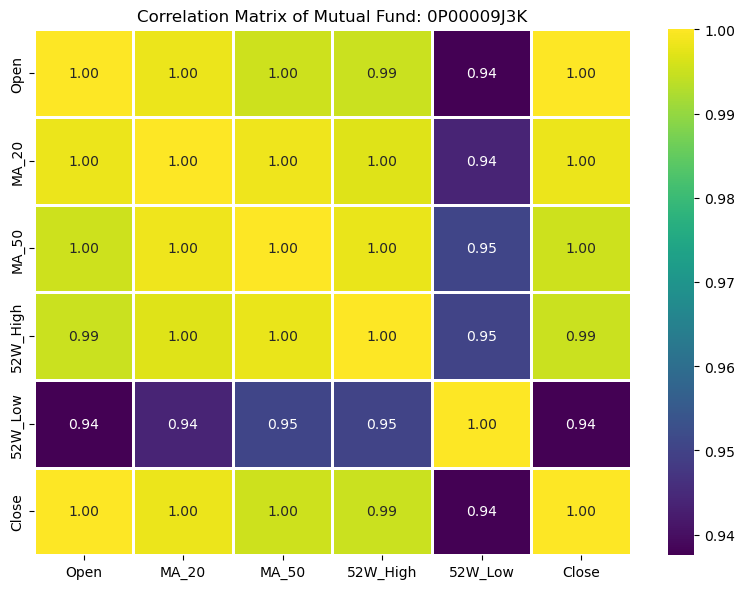


Processing Mutual Fund: 0P0001BAB5


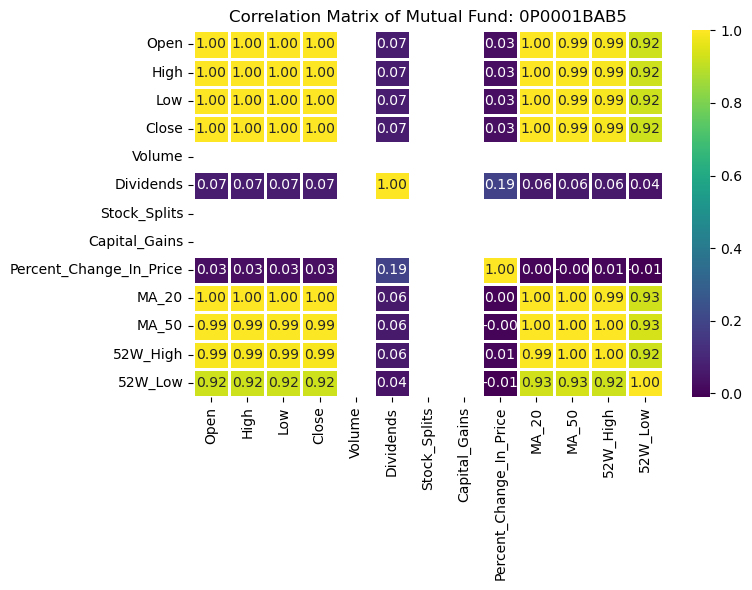


Mutual Fund: 0P0001BAB5 - Feature Importances:
Open        0.786215
52W_High    0.073069
MA_20       0.069366
MA_50       0.069157
52W_Low     0.002192
dtype: float64


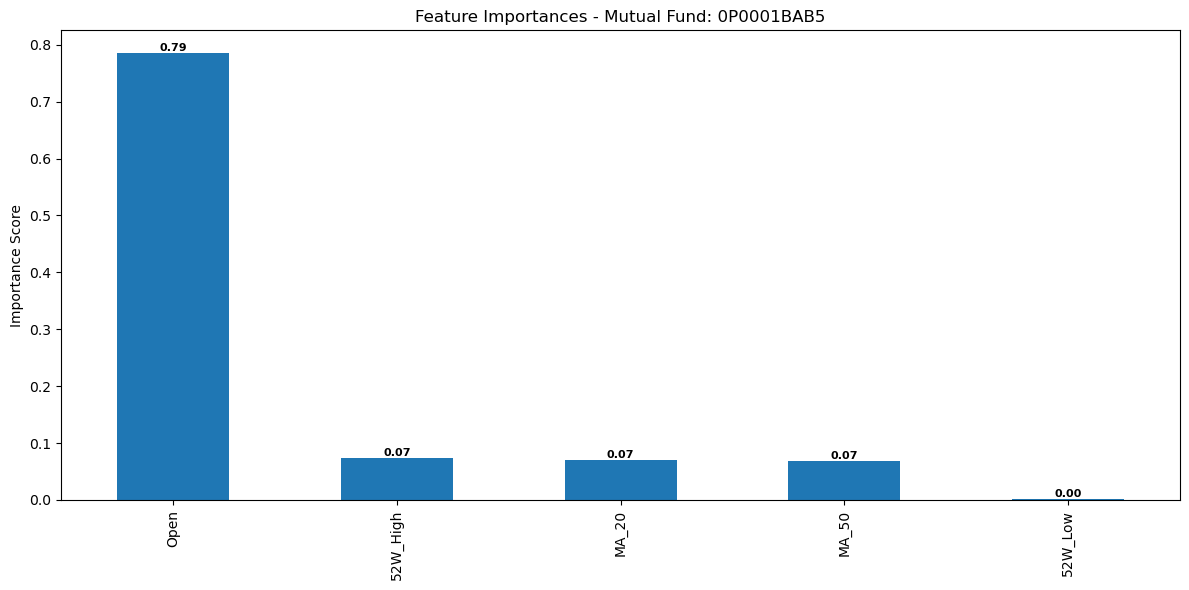

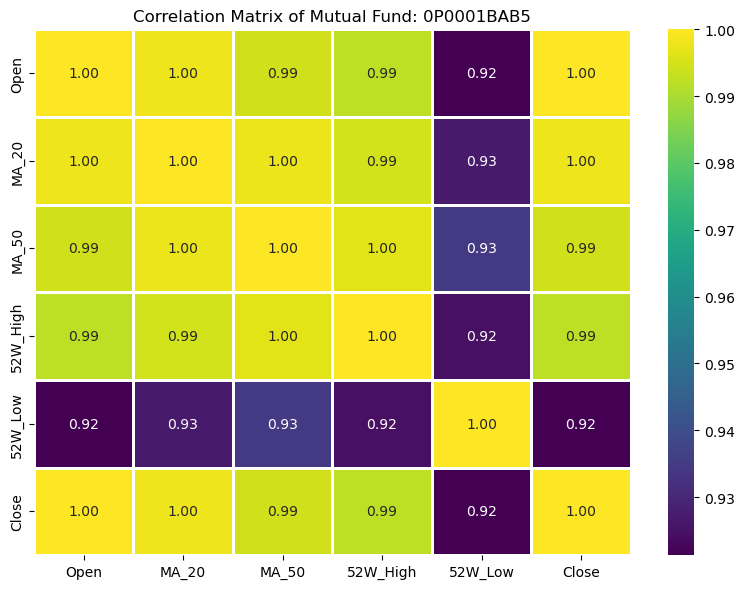


Processing Mutual Fund: 0P0001EI18


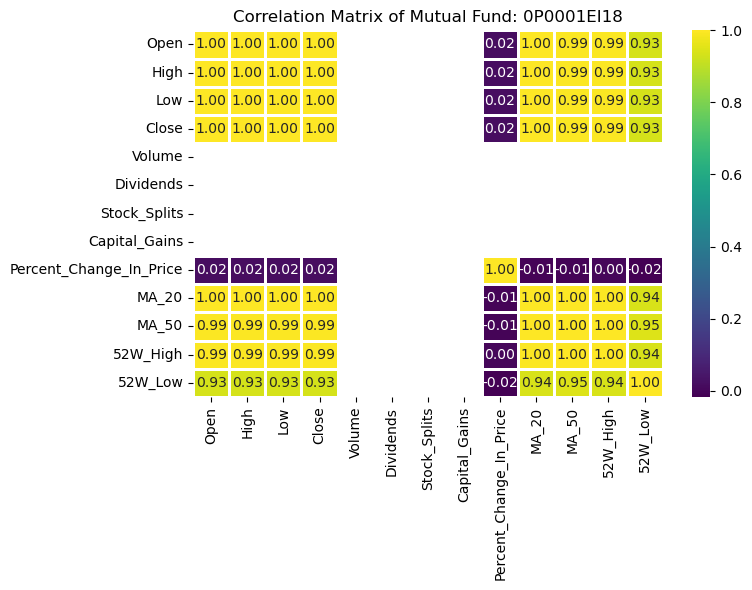


Mutual Fund: 0P0001EI18 - Feature Importances:
Open        0.908683
52W_High    0.063322
MA_20       0.014222
MA_50       0.013215
52W_Low     0.000558
dtype: float64


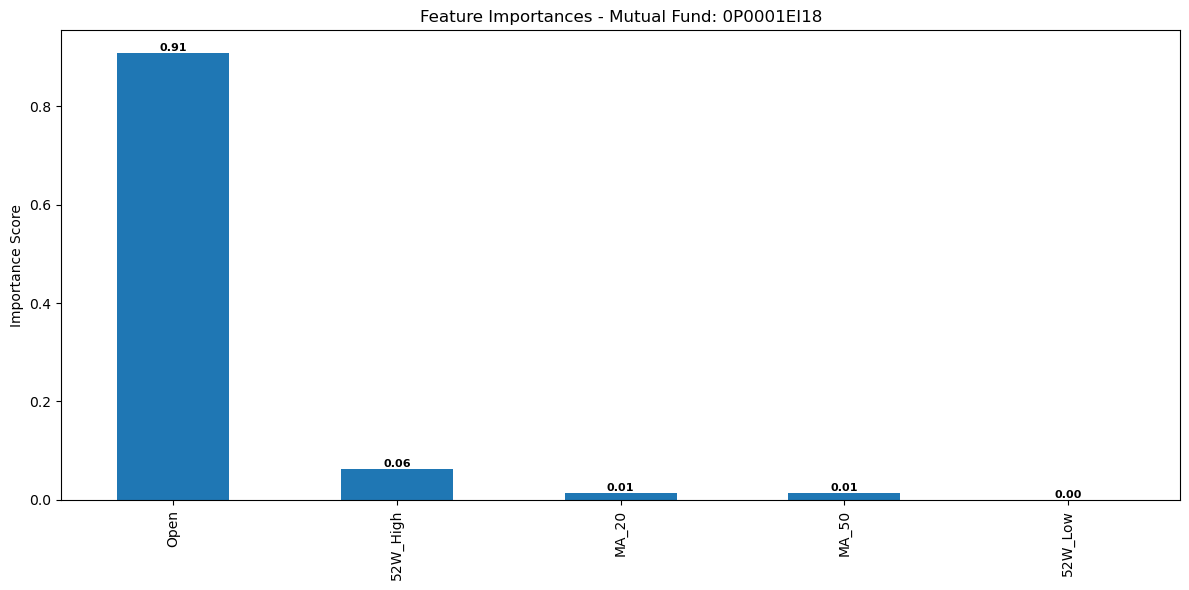

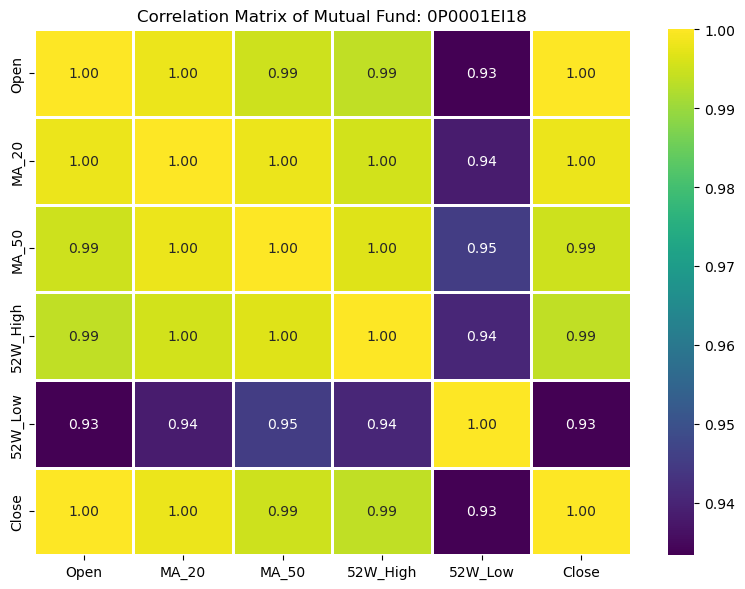


Processing Mutual Fund: 0P0001BA1R


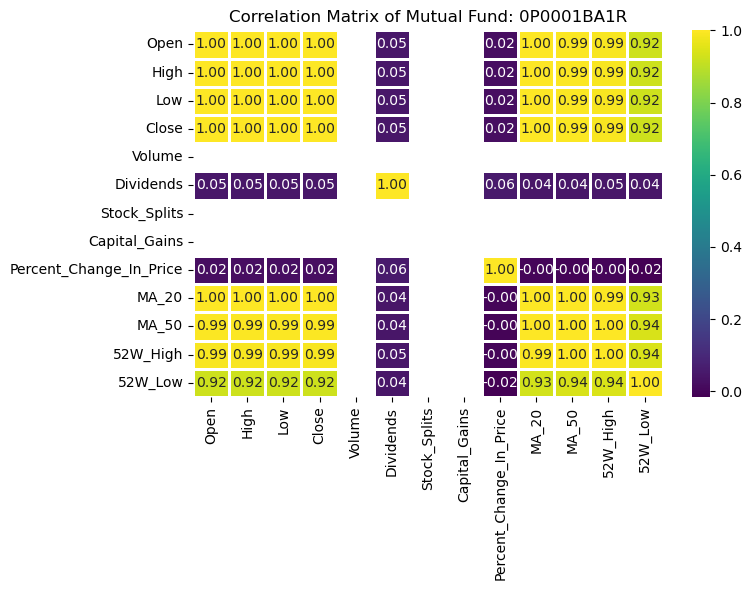


Mutual Fund: 0P0001BA1R - Feature Importances:
Open        0.825877
52W_High    0.089328
MA_20       0.046368
MA_50       0.038370
52W_Low     0.000057
dtype: float64


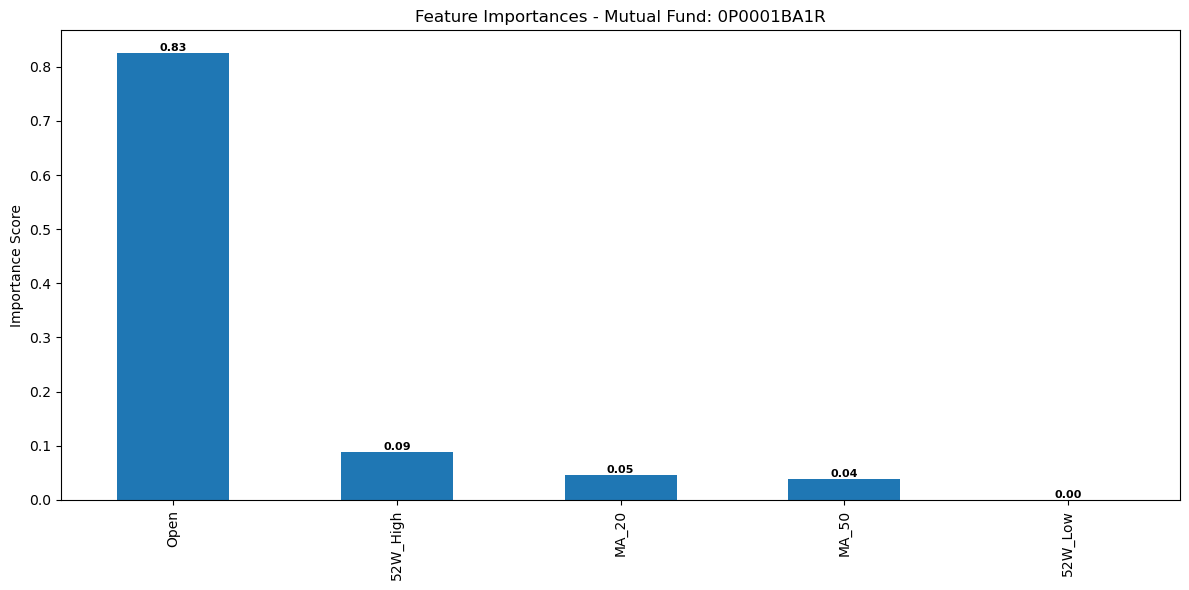

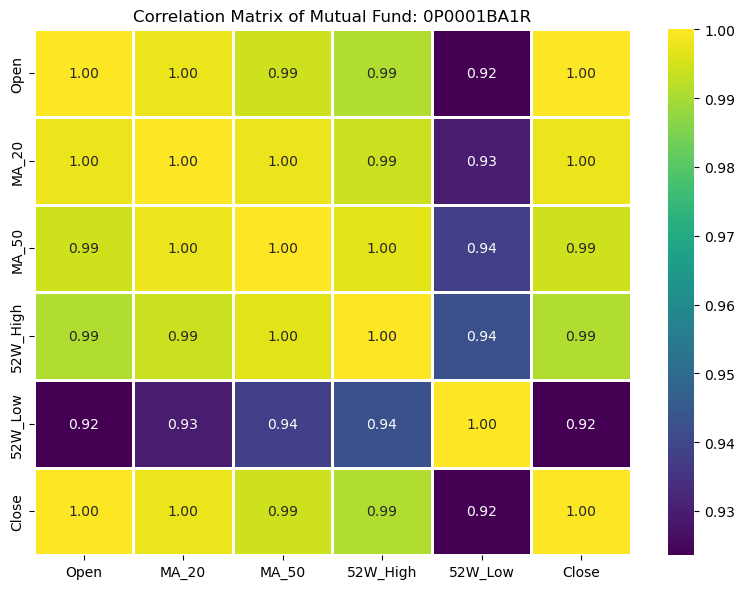


Processing Mutual Fund: 0P00005WEY


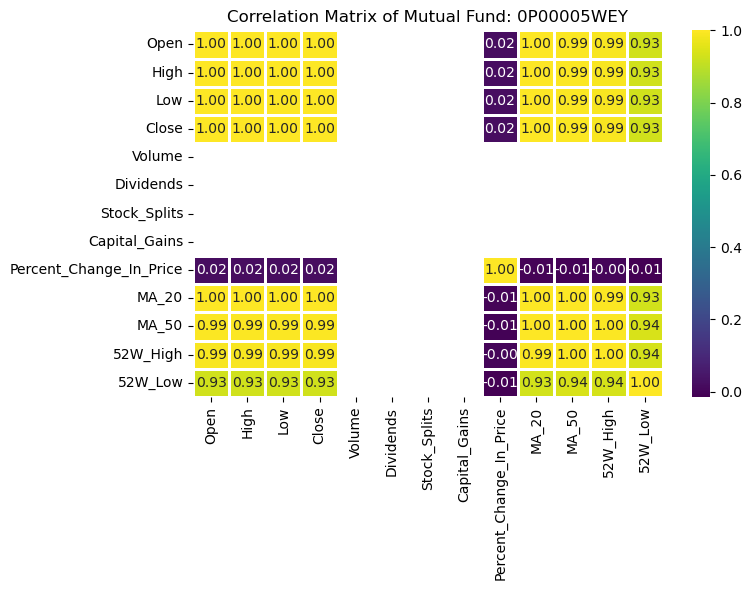


Mutual Fund: 0P00005WEY - Feature Importances:
Open        0.295398
MA_50       0.237859
MA_20       0.218932
52W_High    0.217521
52W_Low     0.030290
dtype: float64


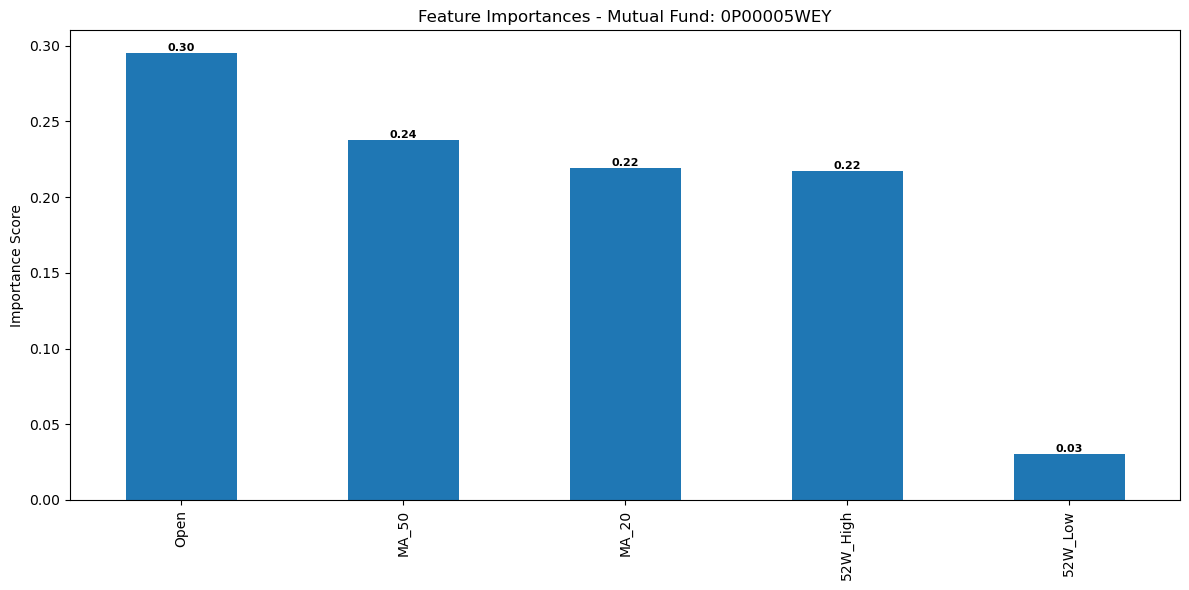

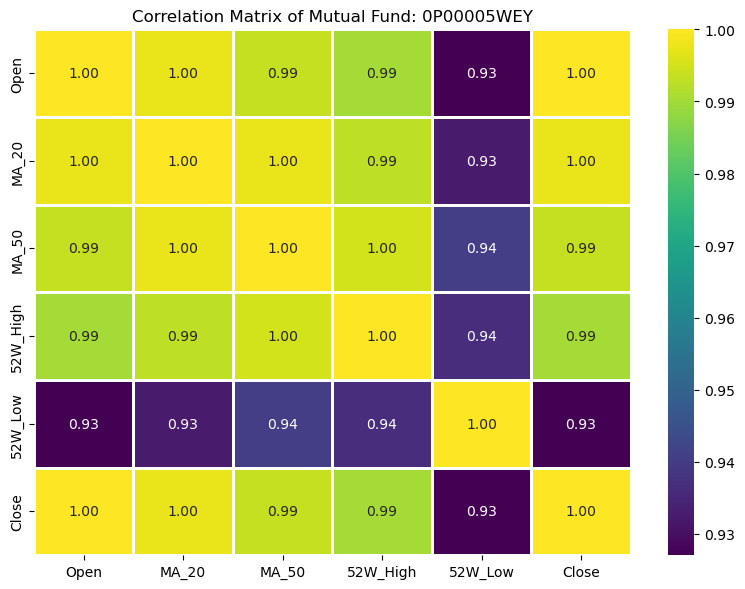


Processing Mutual Fund: 0P0000XUXL


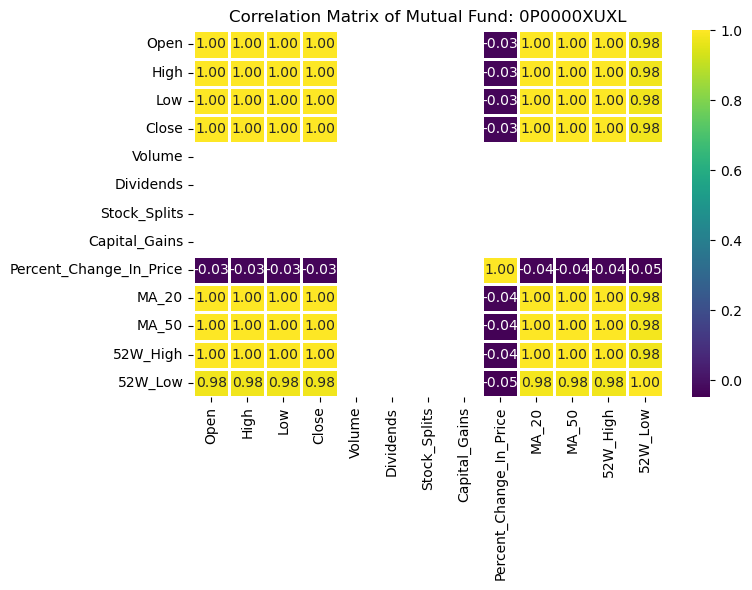


Mutual Fund: 0P0000XUXL - Feature Importances:
Open        0.245833
MA_50       0.221477
MA_20       0.216368
52W_High    0.207552
52W_Low     0.108770
dtype: float64


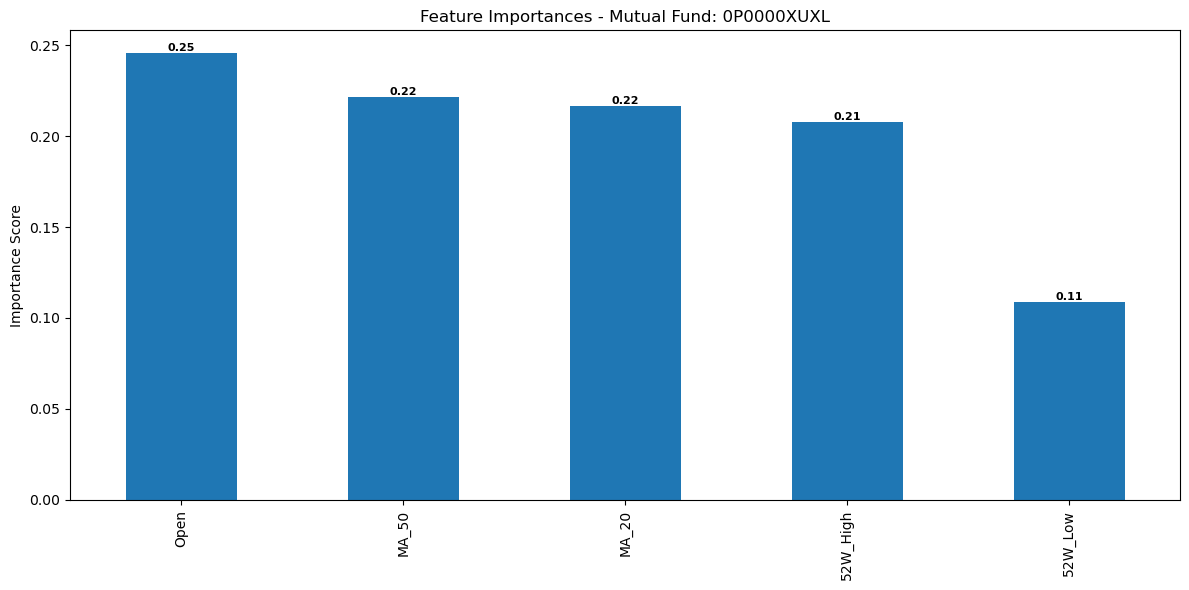

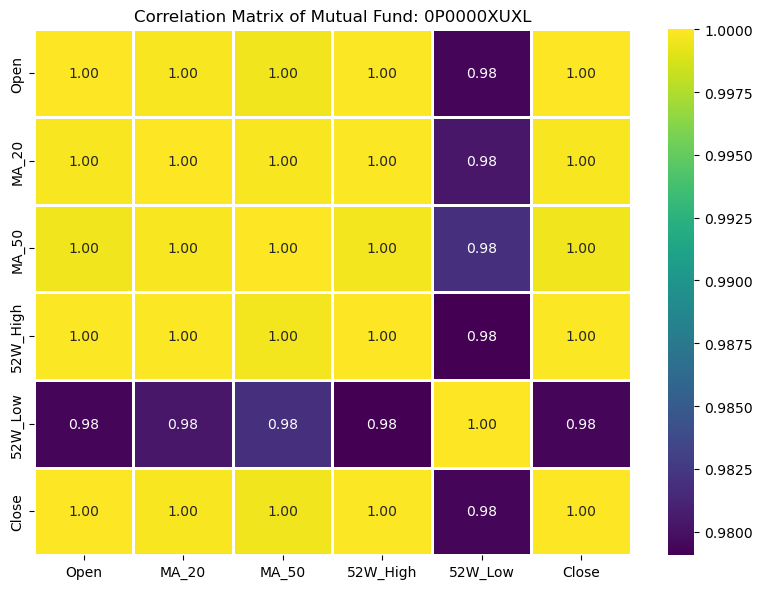


Processing Mutual Fund: 0P0000XUYZ


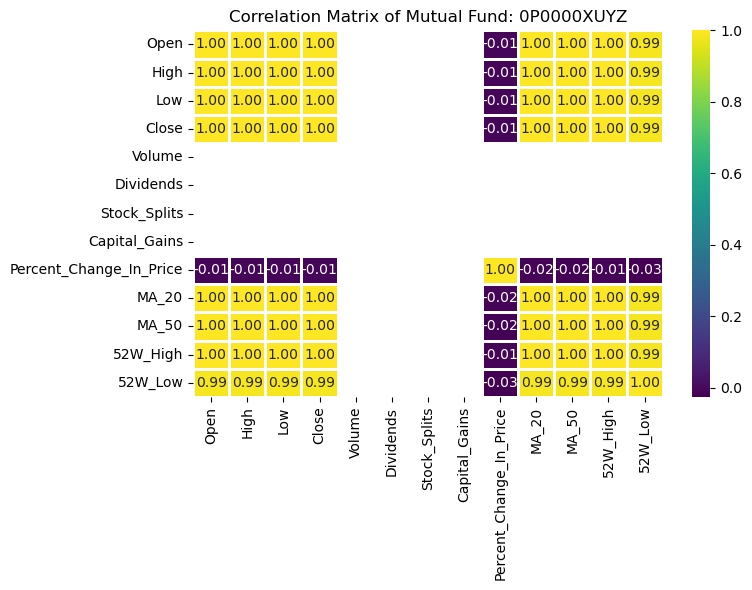


Mutual Fund: 0P0000XUYZ - Feature Importances:
Open        0.242865
MA_50       0.220028
52W_High    0.214829
MA_20       0.208785
52W_Low     0.113493
dtype: float64


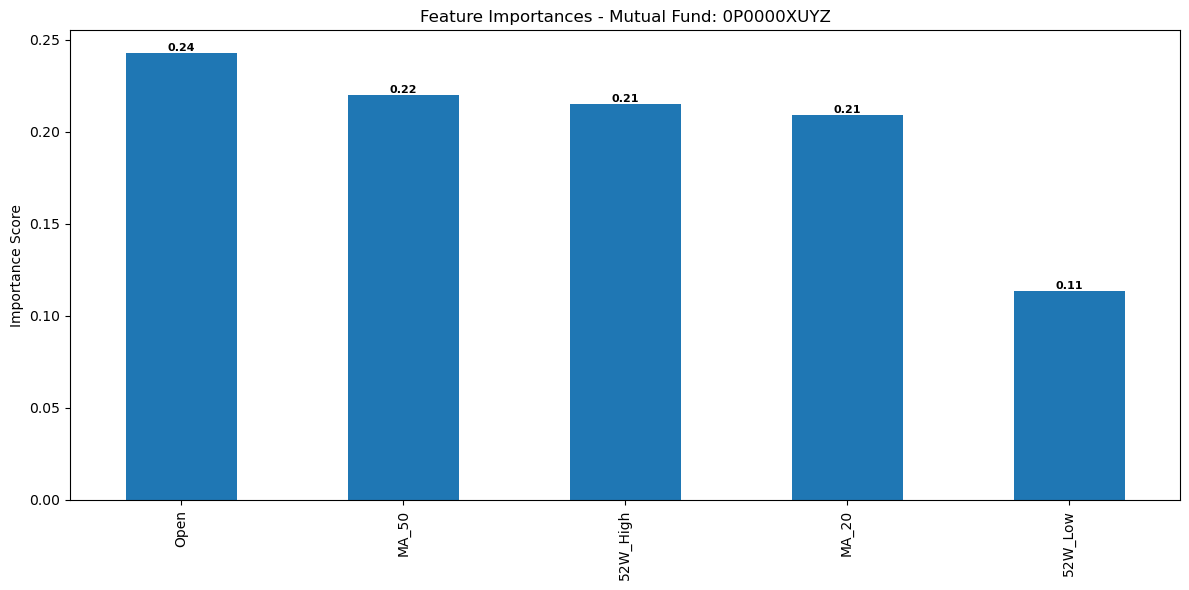

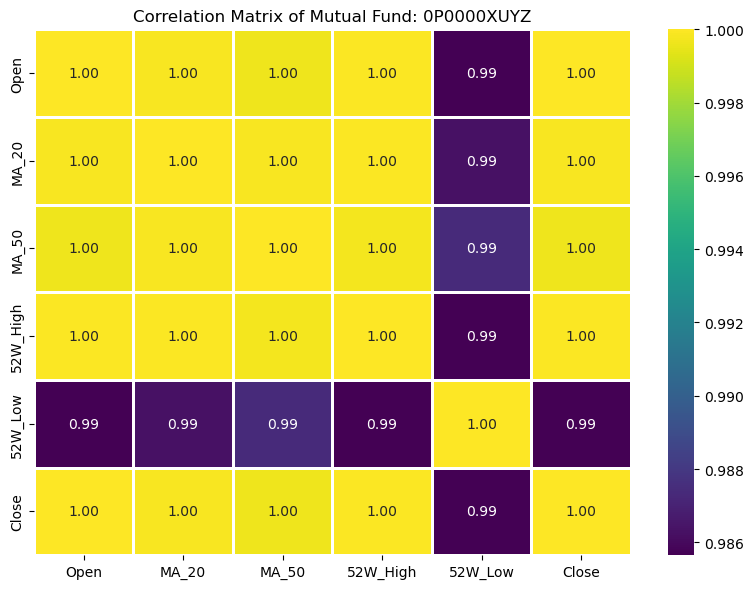


Processing Mutual Fund: 0P0000XW8D


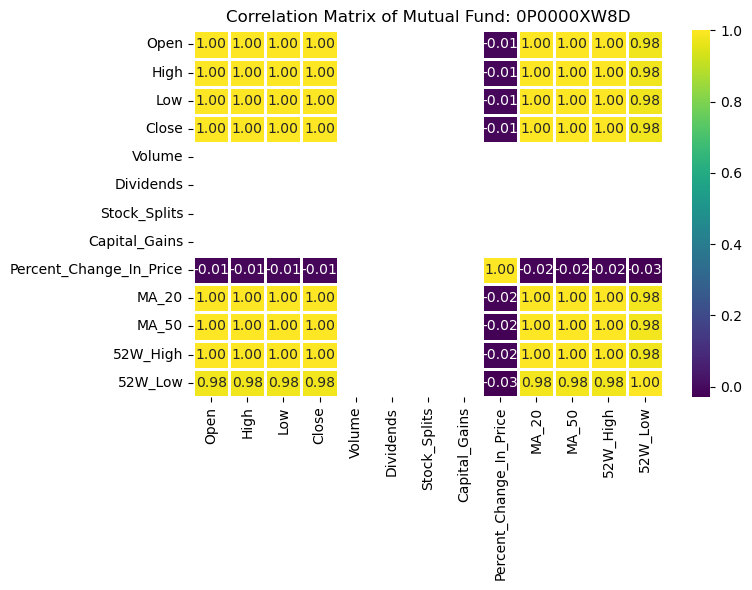


Mutual Fund: 0P0000XW8D - Feature Importances:
Open        0.443240
52W_High    0.202295
MA_20       0.184523
MA_50       0.151806
52W_Low     0.018136
dtype: float64


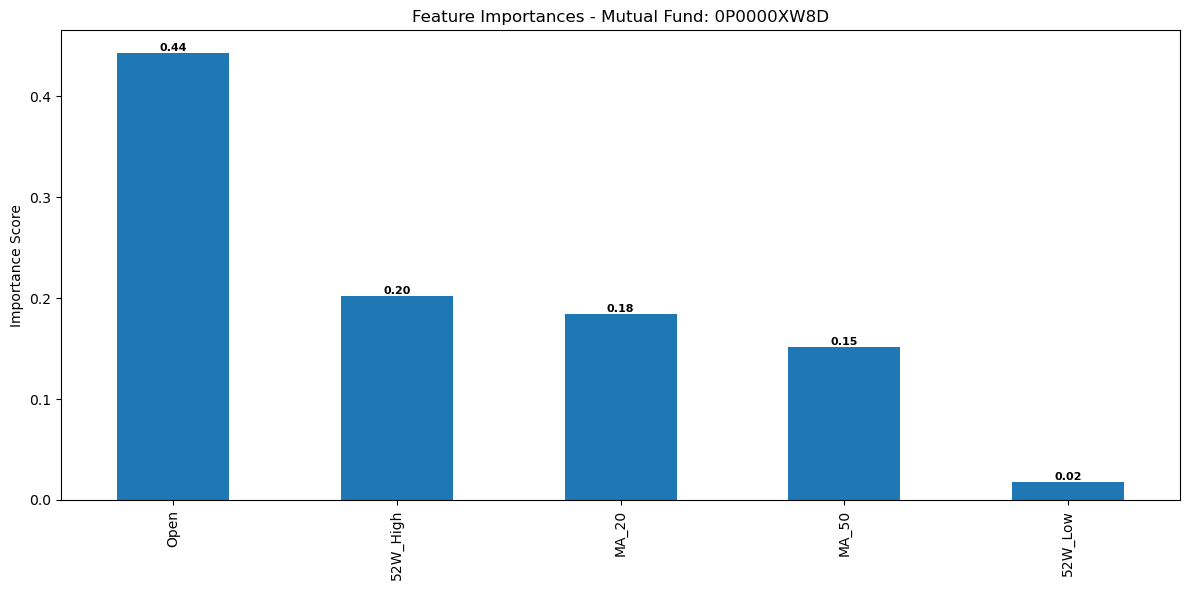

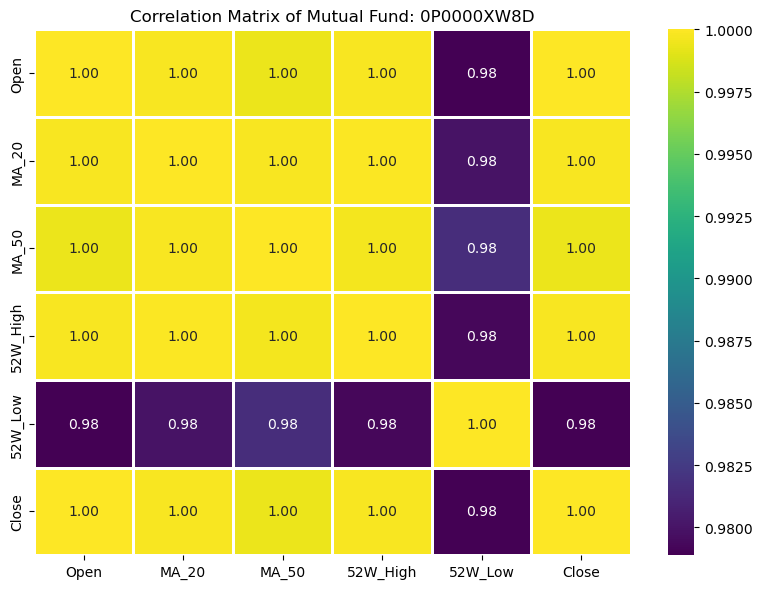


Processing Mutual Fund: 0P0000XVER


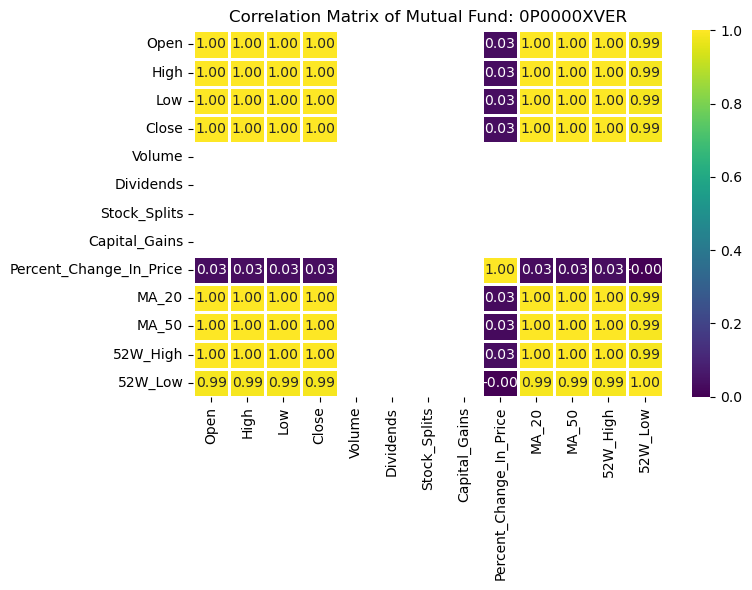


Mutual Fund: 0P0000XVER - Feature Importances:
52W_Low     0.212913
Open        0.210880
MA_20       0.198301
MA_50       0.192371
52W_High    0.185535
dtype: float64


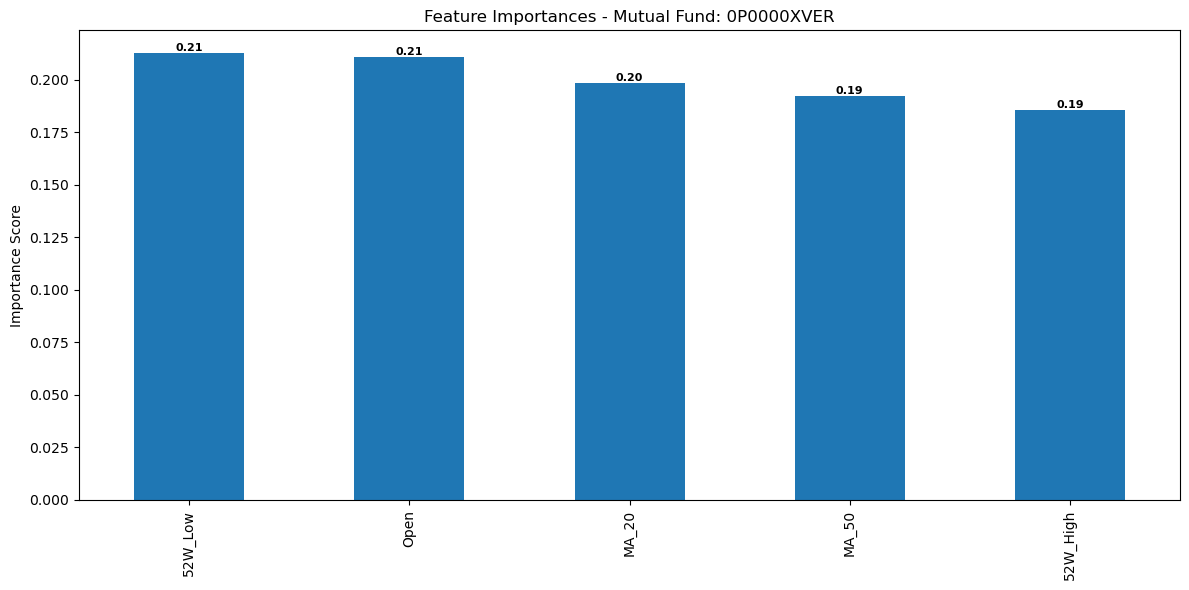

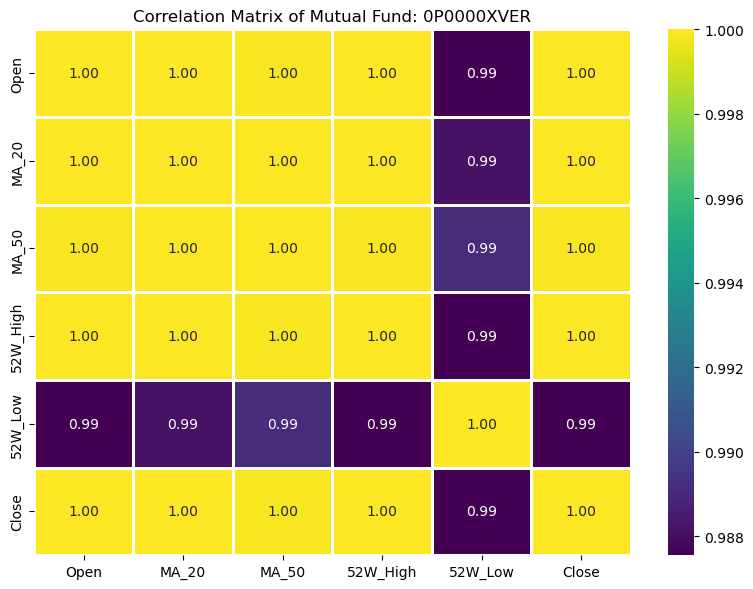


Processing Mutual Fund: 0P0000XUYS


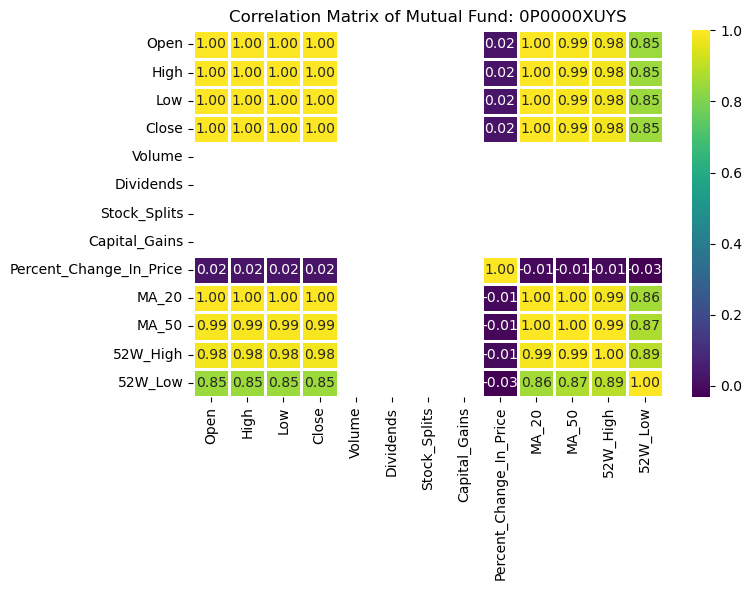


Mutual Fund: 0P0000XUYS - Feature Importances:
Open        0.448586
52W_High    0.191734
MA_50       0.190669
MA_20       0.169009
52W_Low     0.000001
dtype: float64


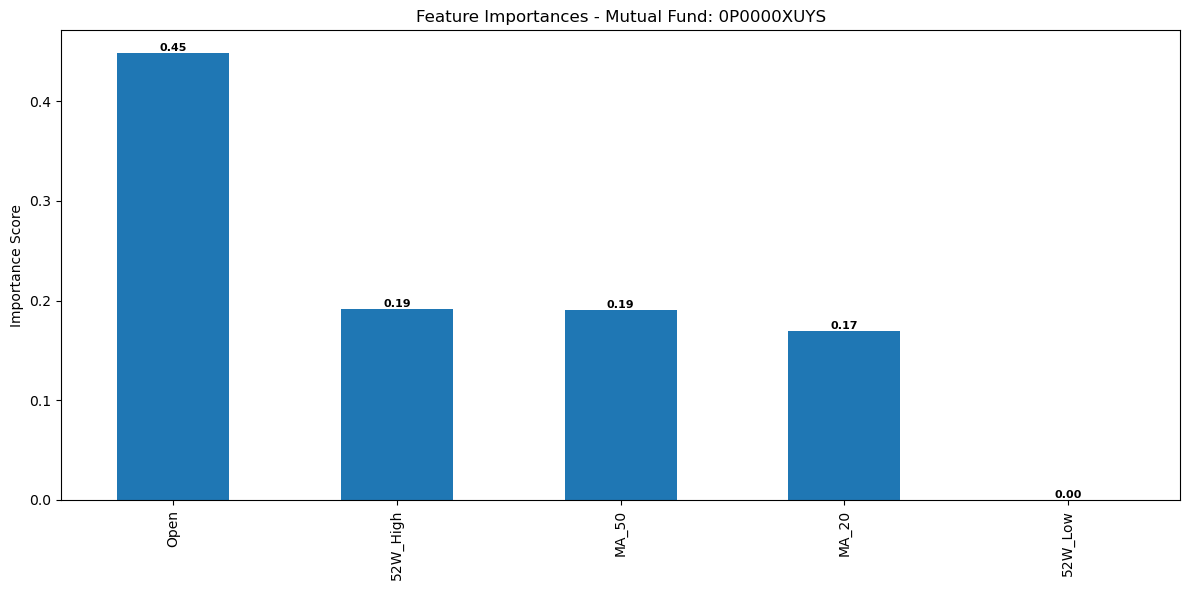

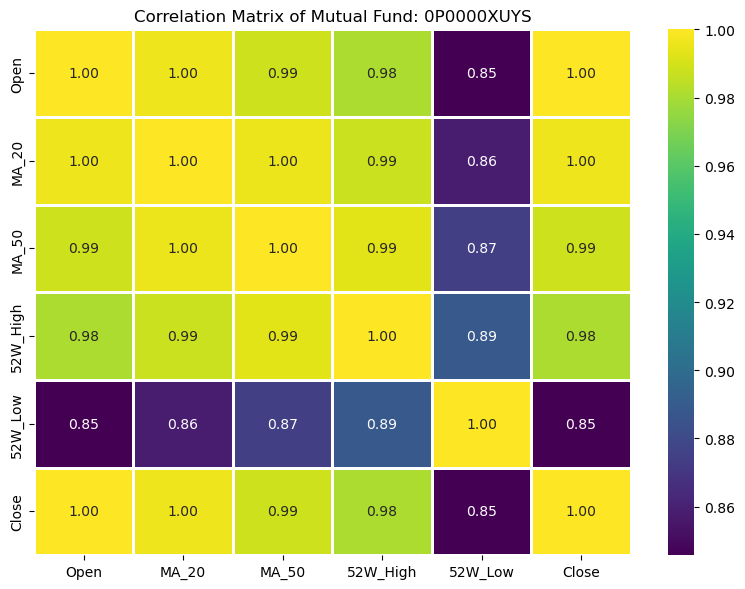


Processing Mutual Fund: 0P0000XW7I


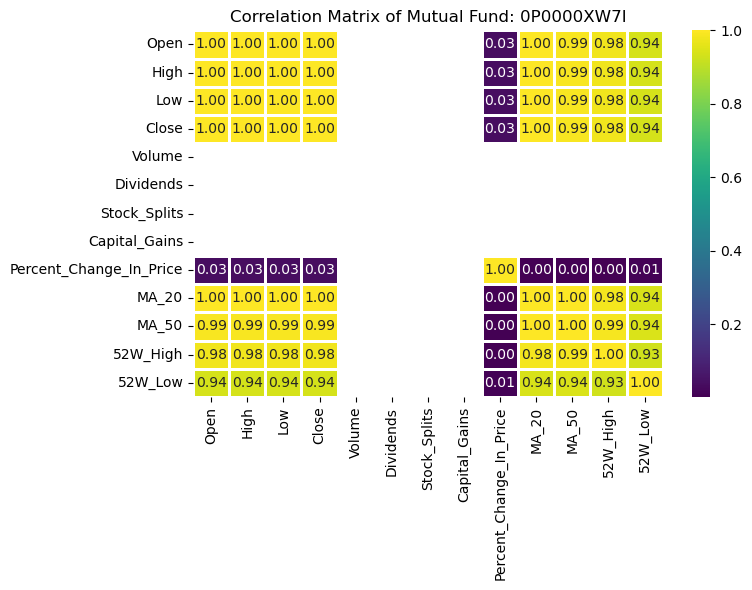


Mutual Fund: 0P0000XW7I - Feature Importances:
Open        0.927119
52W_High    0.038193
MA_20       0.019736
MA_50       0.014941
52W_Low     0.000011
dtype: float64


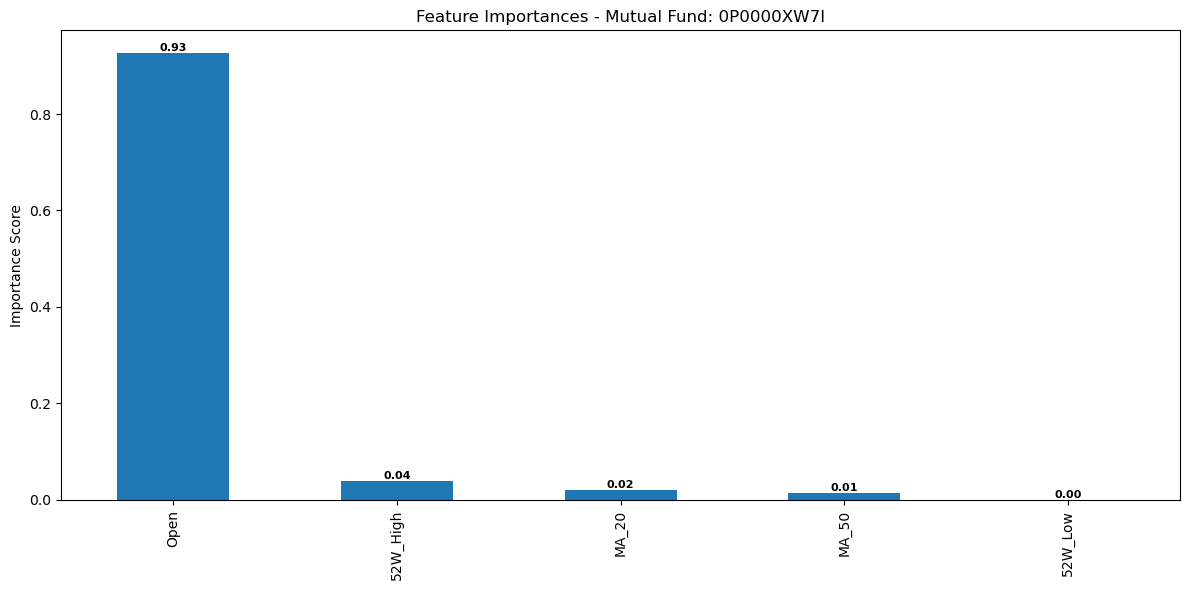

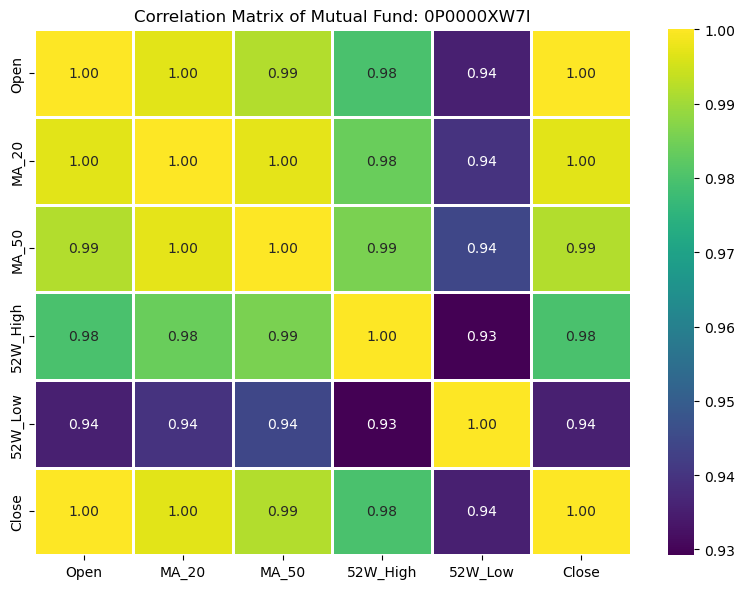


Processing Mutual Fund: 0P0000U3OG


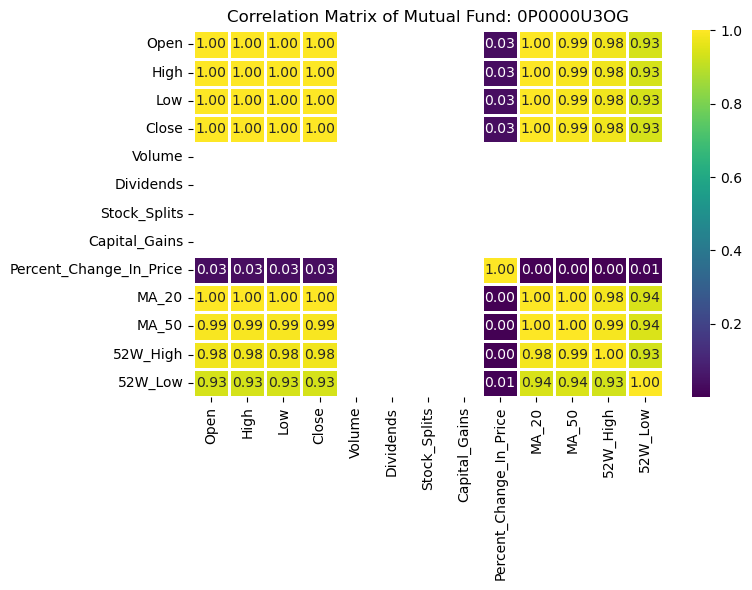


Mutual Fund: 0P0000U3OG - Feature Importances:
Open        0.912034
MA_50       0.036649
52W_High    0.034426
MA_20       0.013073
52W_Low     0.003818
dtype: float64


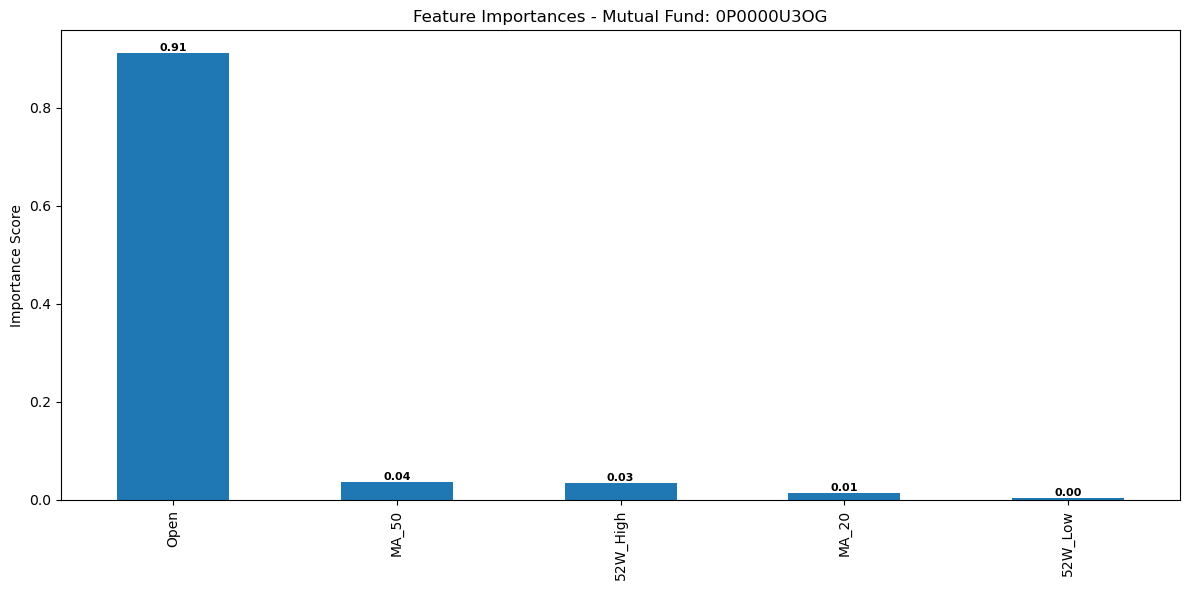

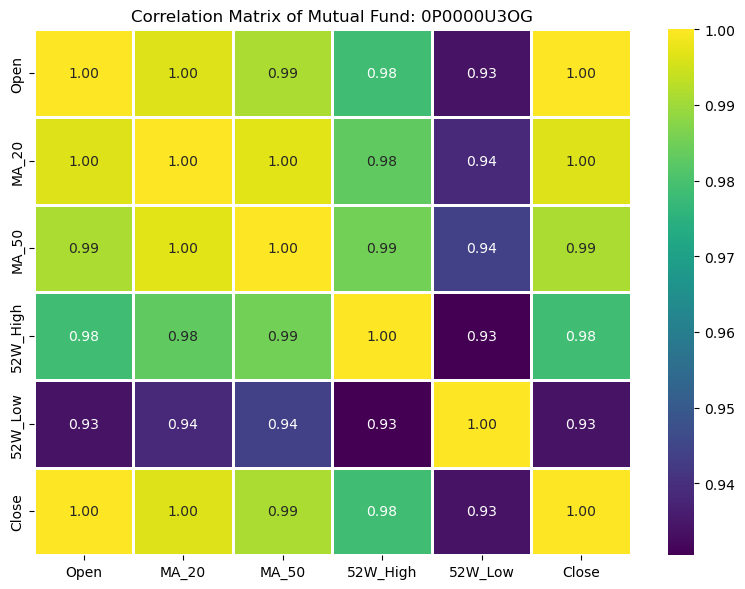


Processing Mutual Fund: SETFGOLD


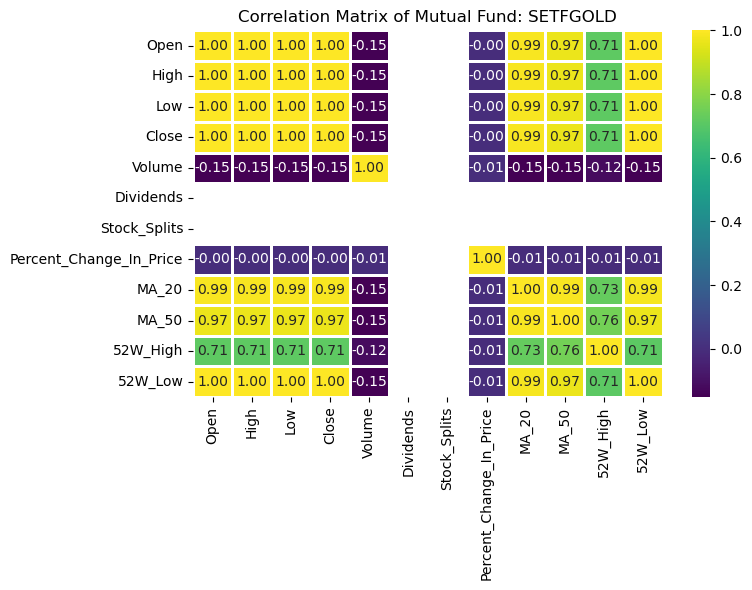


Mutual Fund: SETFGOLD - Feature Importances:
52W_Low     0.504328
Open        0.494075
MA_50       0.000778
MA_20       0.000775
52W_High    0.000044
dtype: float64


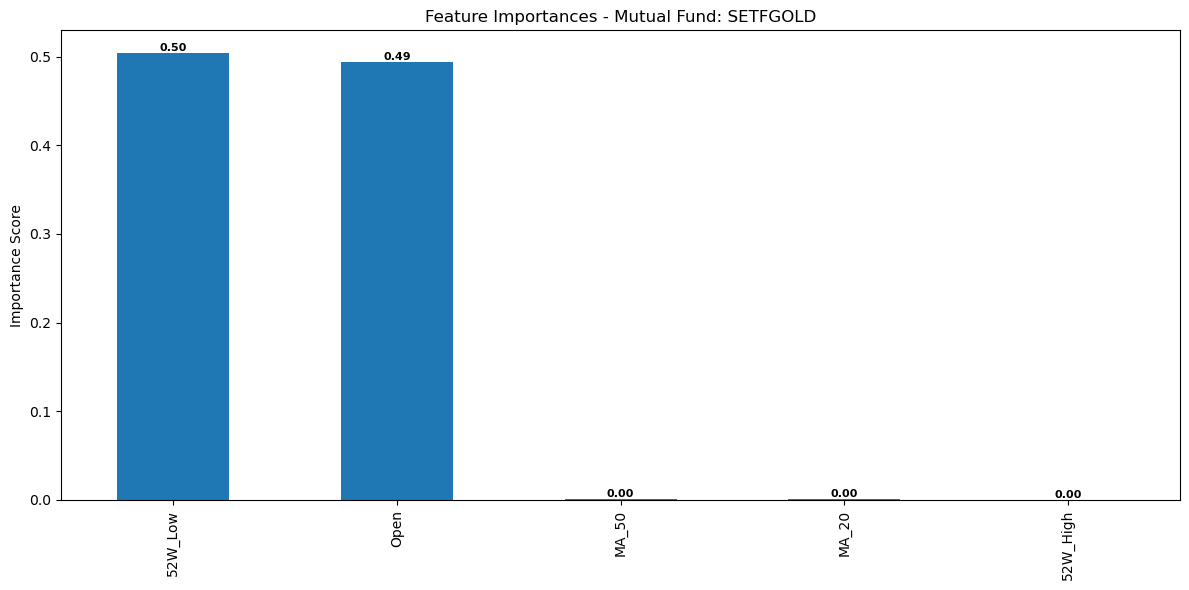

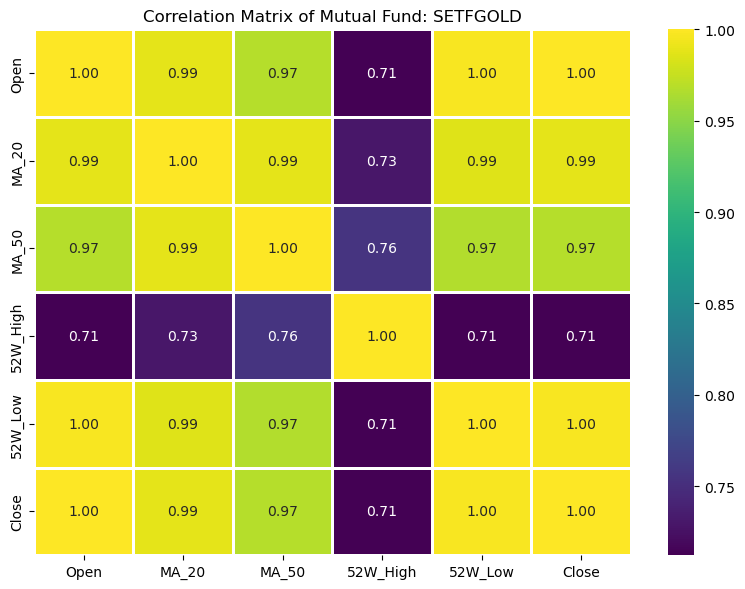


Processing Mutual Fund: BSLGOLDETF


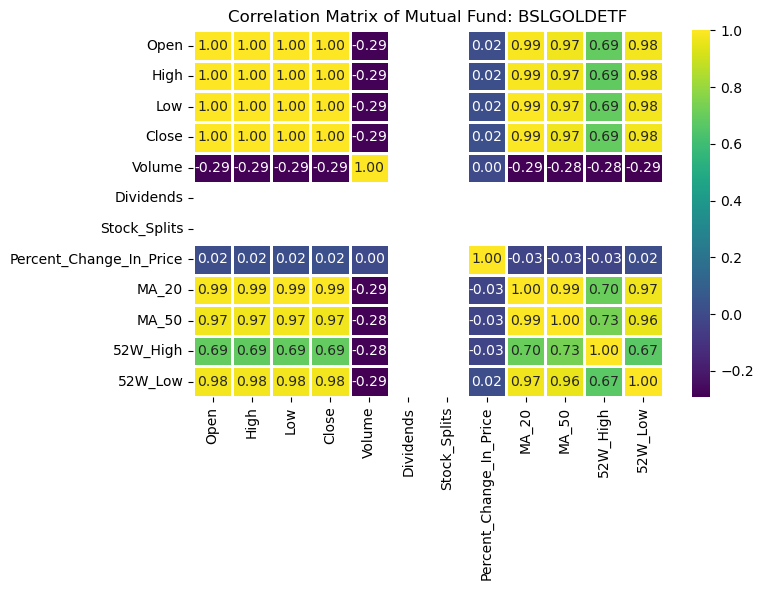


Mutual Fund: BSLGOLDETF - Feature Importances:
Open        0.540209
52W_Low     0.428414
MA_50       0.021467
52W_High    0.007529
MA_20       0.002381
dtype: float64


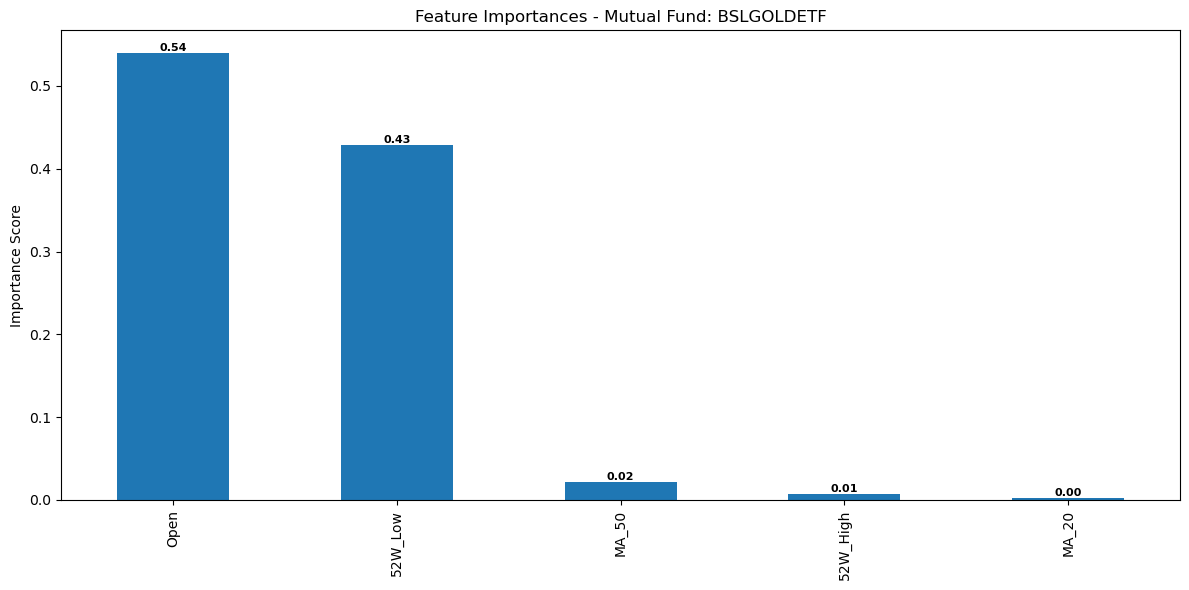

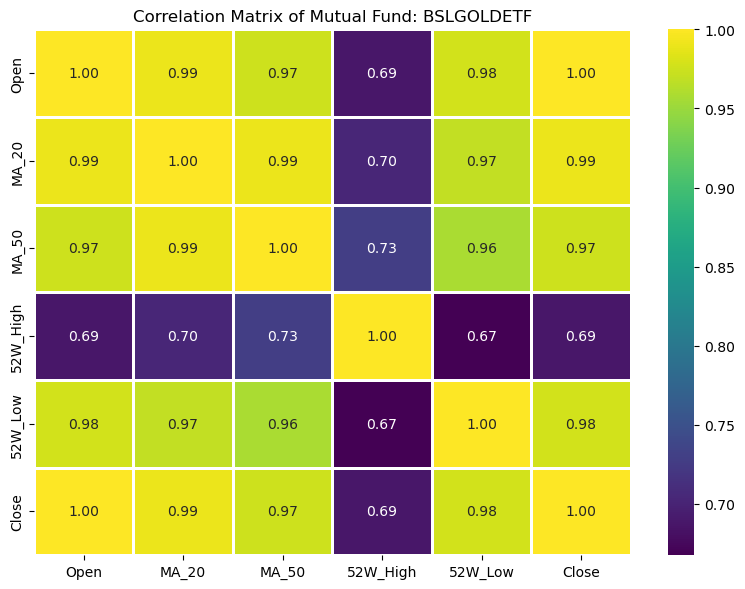

In [24]:
mutual_funds_excel_file = '../Data/Mutual_Funds_Data.xlsx'
all_mutual_funds = pd.read_excel(mutual_funds_excel_file, sheet_name=None)

print("### Feature Selection for Each Mutual Fund ###")
for sheet_name, df in all_mutual_funds.items():
    asset_identifier = f"Mutual Fund: {sheet_name}"
    print(f"\nProcessing {asset_identifier}")
    feat_imp = select_features_rf(df, asset_name=asset_identifier)

### Feature Selection for Gold Bonds

### Feature Selection for Gold Bonds ###


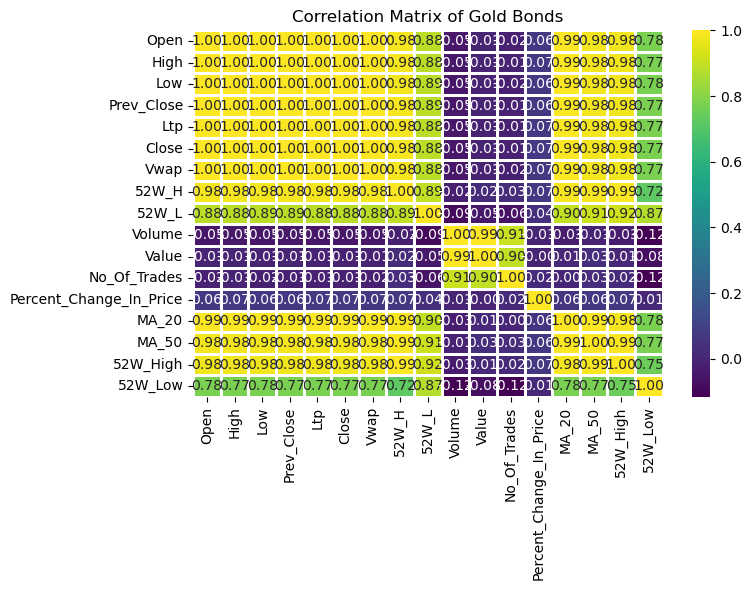


Gold Bonds - Feature Importances:
Open        0.649310
MA_50       0.147807
MA_20       0.128980
52W_High    0.073793
52W_Low     0.000110
dtype: float64


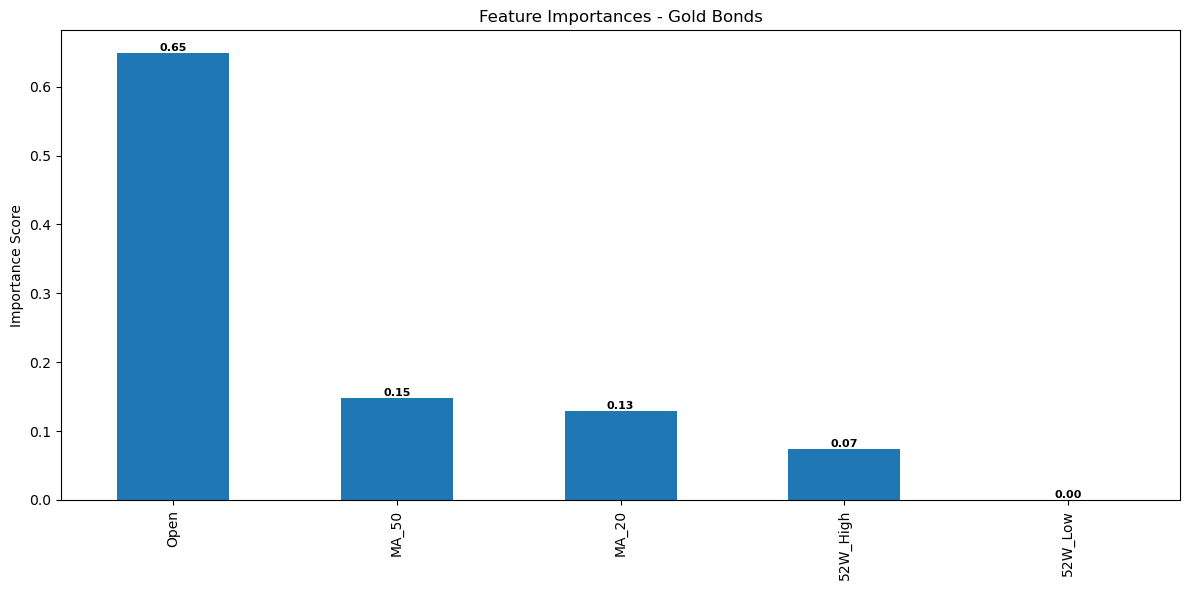

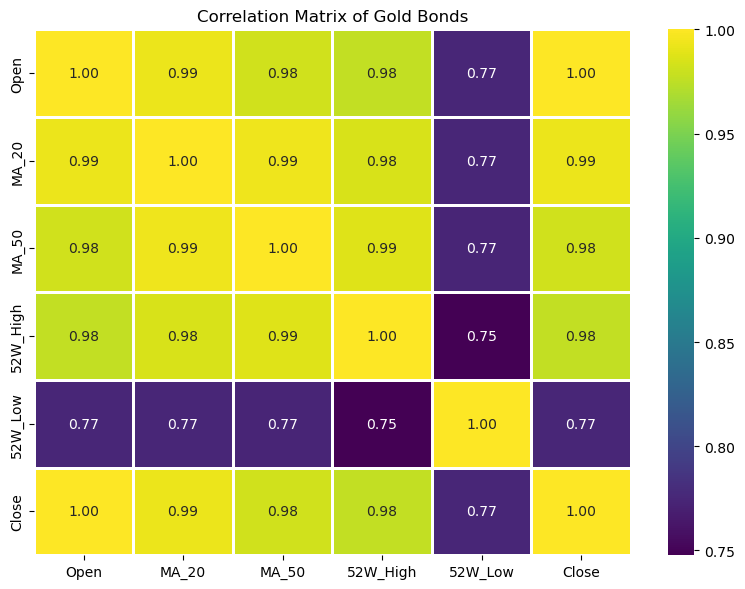

In [25]:
gold_bonds_file = '../Data/Gold_Bond_Data.xlsx'
gold_df = pd.read_excel(gold_bonds_file)

print("### Feature Selection for Gold Bonds ###")
feat_imp_gold = select_features_rf(gold_df, asset_name="Gold Bonds")